In [1]:
# Importing liberaries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler
import seaborn as sns
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from tabulate import tabulate
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
%matplotlib inline

In [2]:
# reading dataset
# This data set is collected using web scraping methods from https://bitinfocharts.com till 18th may 2021
df=pd.read_csv("BTC_Data_final.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.set_index("Date", inplace = True)

In [4]:
df.head()

,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap
Date,,,,,,,,,,,,,,,,,
2014-04-09,447.110,243742.0,122401,64992,38.678,239212041.0,0.1390,0.0447,8.944,5587996110,4115.0,100.420,8193,11.193,0.502,179274,19.211
2014-04-10,407.703,254334.0,124298,67872,31.917,310367120.0,0.0864,0.0408,9.290,5020359905,4876.0,120.946,15039,13.854,0.371,182996,19.166
2014-04-11,403.328,223656.0,117926,65563,36.814,292756343.0,0.0858,0.0403,8.521,5068919648,4819.0,108.481,14907,12.997,0.330,169622,19.141
2014-04-12,425.310,169964.0,87828,47579,34.498,157264741.0,0.0811,0.0425,8.944,5329088351,3574.0,84.408,7582,9.229,0.226,132283,19.145
2014-04-13,415.876,162260.0,94828,50981,34.141,154756367.0,0.0840,0.0416,7.701,5150414718,3332.0,69.681,10674,10.385,0.221,172708,19.131


In [5]:
df.tail(6)

,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap
Date,,,,,,,,,,,,,,,,,
2022-12-17,16699.0,703268.0,536035,263062,0.0679,4.970511e+09,1.107,0.471,10.435,321216328776,49982.0,361.097,89303,17.697,1.982,846989,14.752
2022-12-18,16736.0,511467.0,439567,212528,0.0650,3.493454e+09,0.912,0.377,9.931,321956223728,55620.0,400.564,81518,15.485,1.263,691511,14.731
2022-12-19,16679.0,706111.0,484919,258960,0.0569,6.191116e+09,1.164,0.450,10.588,320876529094,67503.0,447.028,100038,17.697,2.083,804421,14.672
2022-12-20,16788.0,665567.0,510455,268753,0.0630,6.787239e+09,1.128,0.470,10.286,322974092809,61942.0,449.510,90756,18.329,2.022,815486,14.681
2022-12-21,16830.0,653348.0,515872,272348,0.0620,6.851055e+09,1.021,0.418,10.070,323809163721,53386.0,434.257,88992,18.329,1.817,782726,14.673
2022-12-22,16779.0,676142.0,526770,271046,0.0596,5.924482e+09,1.061,0.442,10.667,322835455577,50808.0,453.449,88226,18.329,1.992,789264,14.687


In [6]:
df.shape

(3180, 17)

In [7]:
from pandas_profiling import ProfileReport

In [8]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [9]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# checking data set contains null values
df.isnull().values.any()

False

In [11]:
missed = pd.DataFrame()
missed['column'] = df.columns

missed['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]

missed = missed.sort_values('percent',ascending=False)
print(missed)

                    column  percent
0                 priceUSD      0.0
9                marketcap      0.0
15         activeaddresses      0.0
14           fee_to_reward      0.0
13           google_trends      0.0
12                  tweets      0.0
11  mediantransactionvalue      0.0
10        transactionvalue      0.0
8         confirmationtime      0.0
1                     size      0.0
7   median_transaction_fee      0.0
6          transactionfees      0.0
5                sentinusd      0.0
4     mining_profitability      0.0
3             transactions      0.0
2            sentbyaddress      0.0
16               top100cap      0.0


In [12]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)
print(mem_usage(df))

0.44 MB


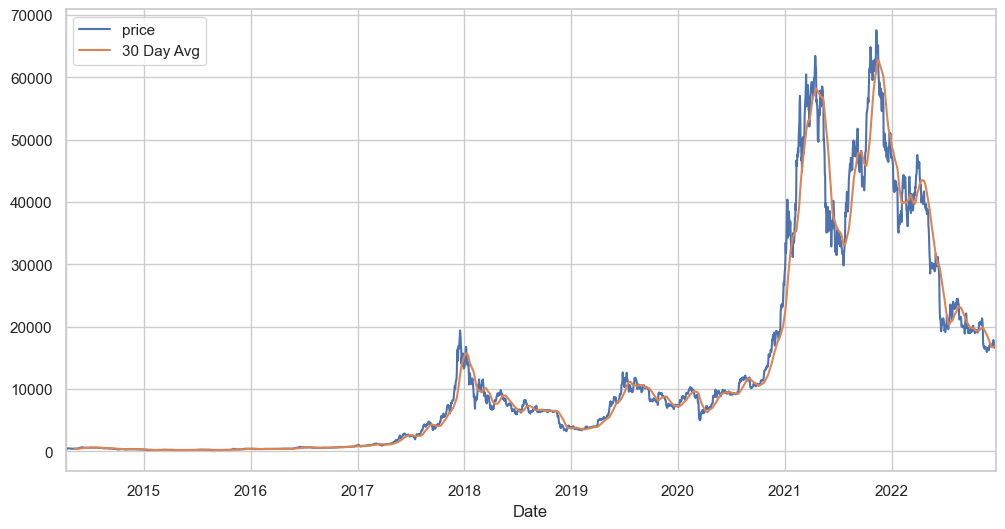

In [13]:
# Visulising the price of BTC 30 day average basis
sns.set()
sns.set_style('whitegrid')
df['priceUSD'].plot(figsize=(12,6),label='price')
df['priceUSD'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
plt.legend()
plt.show()

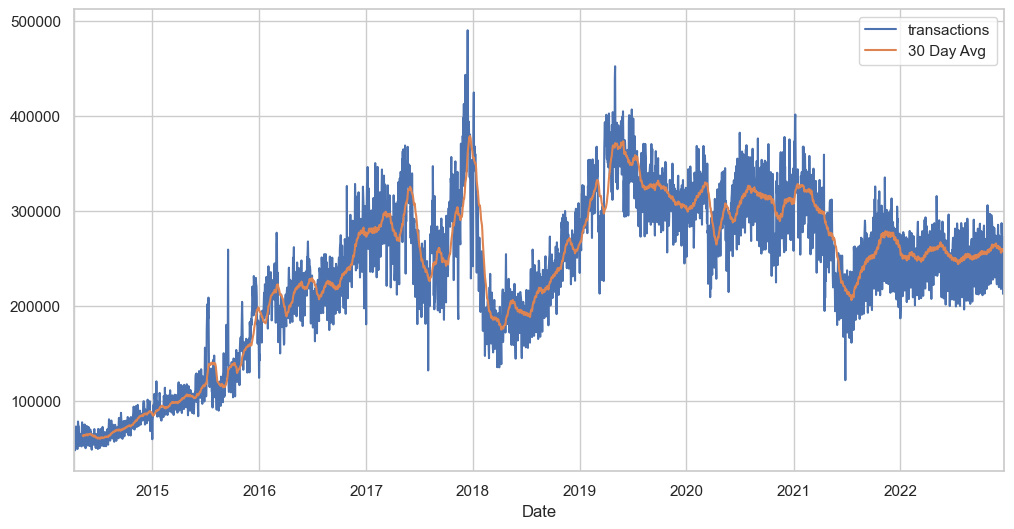

In [14]:
# ploting the no of tractions on 30 average basis
sns.set()
sns.set_style('whitegrid')
df['transactions'].plot(figsize=(12,6),label='transactions')
df['transactions'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
plt.legend()
plt.show()

In [15]:
# statistcs 
from tabulate import tabulate
info = [[col, df[col].count(), df[col].max(), df[col].min(),df[col].mean()] for col in df.columns]
#print(tabulate(info, headers = ['Feature', 'Count', 'Max', 'Min','Mean'], tablefmt = 'orgtbl'))

In [16]:
df1=df.reset_index(drop=True)
X=df1.drop('priceUSD', 1)
X

C:\Users\share\AppData\Local\Temp\ipykernel_13764\4227636930.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df1.drop('priceUSD', 1)


,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap
0,243742.0,122401,64992,38.6780,2.392120e+08,0.1390,0.0447,8.944,5587996110,4115.0,100.420,8193,11.193,0.502,179274,19.211
1,254334.0,124298,67872,31.9170,3.103671e+08,0.0864,0.0408,9.290,5020359905,4876.0,120.946,15039,13.854,0.371,182996,19.166
2,223656.0,117926,65563,36.8140,2.927563e+08,0.0858,0.0403,8.521,5068919648,4819.0,108.481,14907,12.997,0.330,169622,19.141
3,169964.0,87828,47579,34.4980,1.572647e+08,0.0811,0.0425,8.944,5329088351,3574.0,84.408,7582,9.229,0.226,132283,19.145
4,162260.0,94828,50981,34.1410,1.547564e+08,0.0840,0.0416,7.701,5150414718,3332.0,69.681,10674,10.385,0.221,172708,19.131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,511467.0,439567,212528,0.0650,3.493454e+09,0.9120,0.3770,9.931,321956223728,55620.0,400.564,81518,15.485,1.263,691511,14.731
3176,706111.0,484919,258960,0.0569,6.191116e+09,1.1640,0.4500,10.588,320876529094,67503.0,447.028,100038,17.697,2.083,804421,14.672
3177,665567.0,510455,268753,0.0630,6.787239e+09,1.1280,0.4700,10.286,322974092809,61942.0,449.510,90756,18.329,2.022,815486,14.681
3178,653348.0,515872,272348,0.0620,6.851055e+09,1.0210,0.4180,10.070,323809163721,53386.0,434.257,88992,18.329,1.817,782726,14.673


In [17]:
y=df1[["priceUSD"]]
y

,priceUSD
0,447.110
1,407.703
2,403.328
3,425.310
4,415.876
...,...
3175,16736.000
3176,16679.000
3177,16788.000
3178,16830.000


# Dropping those features which is highly correlated each other.

In [18]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

In [19]:
# Drop features 
X.drop(X[to_drop], axis=1,inplace=True)

In [20]:
X_columns=list(X.columns)
y_columns=["priceUSD"]

In [21]:
correlation_result={}
for i in range(len(X_columns)):
    correlation = X[X_columns[i]].corr(y["priceUSD"])
    correlation_result[X_columns[i]]=correlation
correlation_result=sorted(correlation_result.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)

In [22]:
temp=[]
for i in correlation_result:
    temp.append(i[0])
X_train=X[temp]
X_train

,marketcap,sentinusd,sentbyaddress,transactionfees,size,confirmationtime,mining_profitability
0,5587996110,2.392120e+08,122401,0.1390,243742.0,8.944,38.6780
1,5020359905,3.103671e+08,124298,0.0864,254334.0,9.290,31.9170
2,5068919648,2.927563e+08,117926,0.0858,223656.0,8.521,36.8140
3,5329088351,1.572647e+08,87828,0.0811,169964.0,8.944,34.4980
4,5150414718,1.547564e+08,94828,0.0840,162260.0,7.701,34.1410
...,...,...,...,...,...,...,...
3175,321956223728,3.493454e+09,439567,0.9120,511467.0,9.931,0.0650
3176,320876529094,6.191116e+09,484919,1.1640,706111.0,10.588,0.0569
3177,322974092809,6.787239e+09,510455,1.1280,665567.0,10.286,0.0630
3178,323809163721,6.851055e+09,515872,1.0210,653348.0,10.070,0.0620


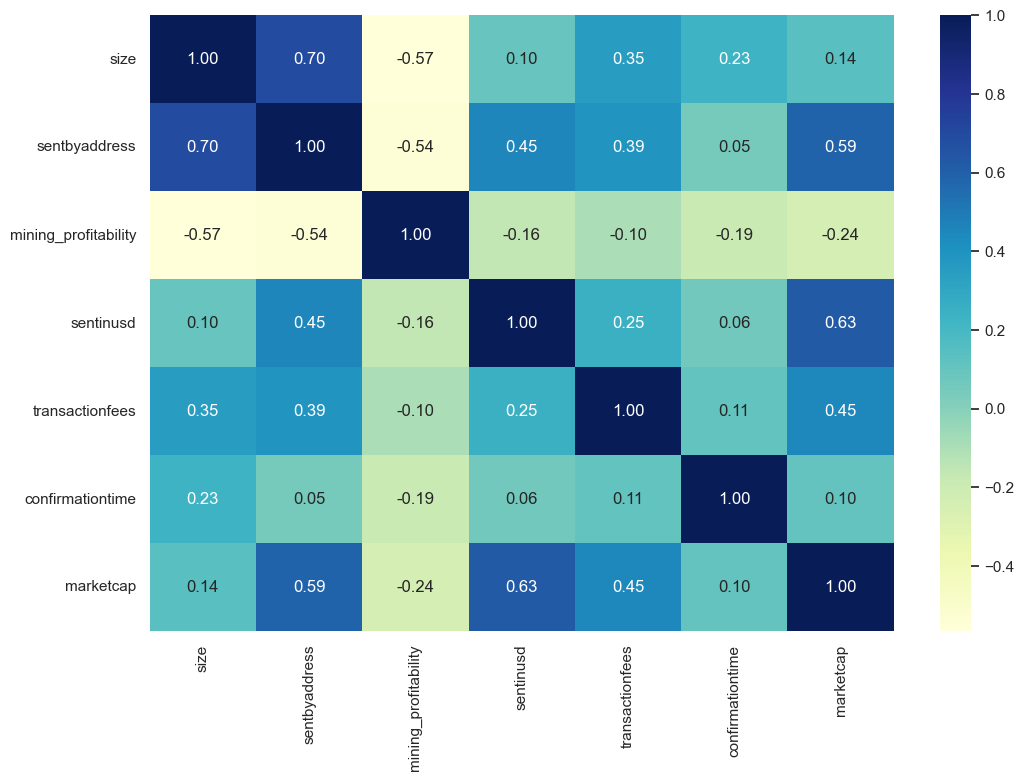

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')
plt.show()

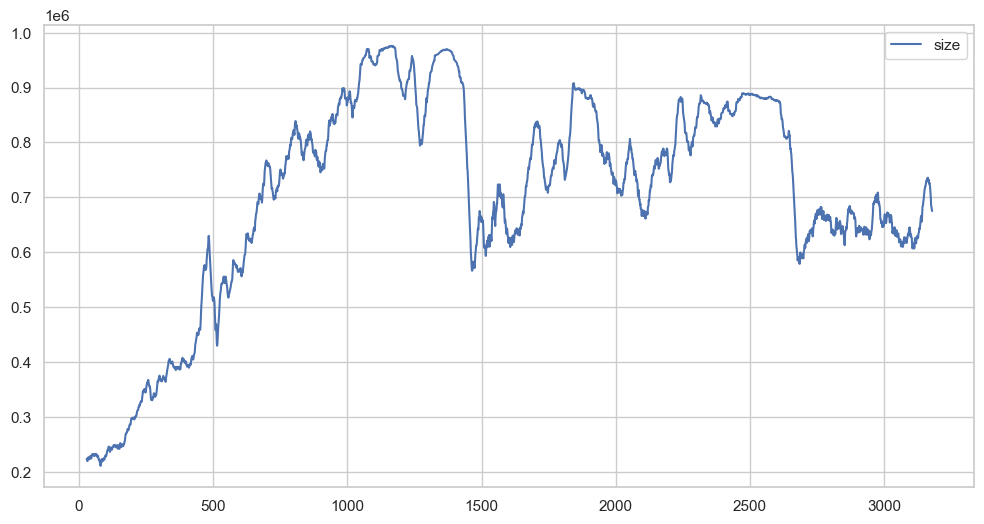

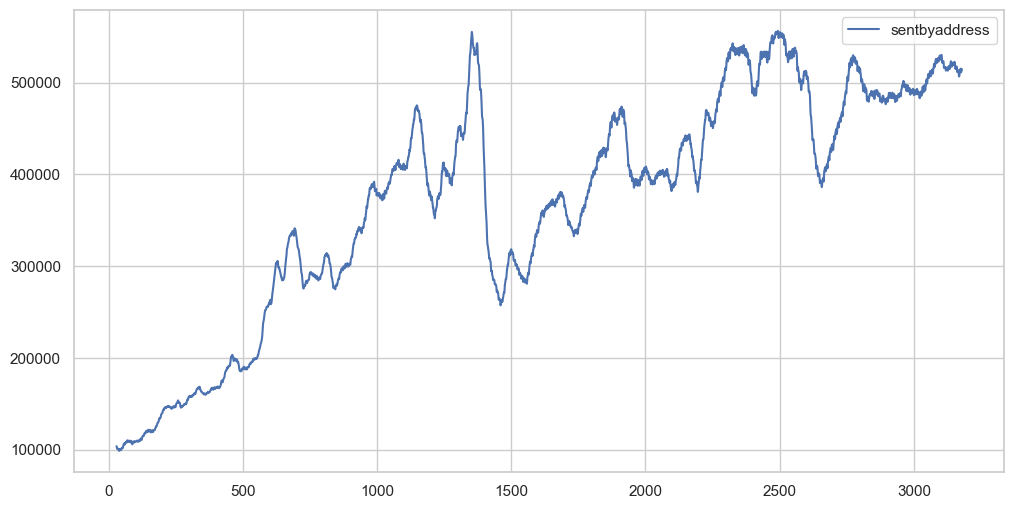

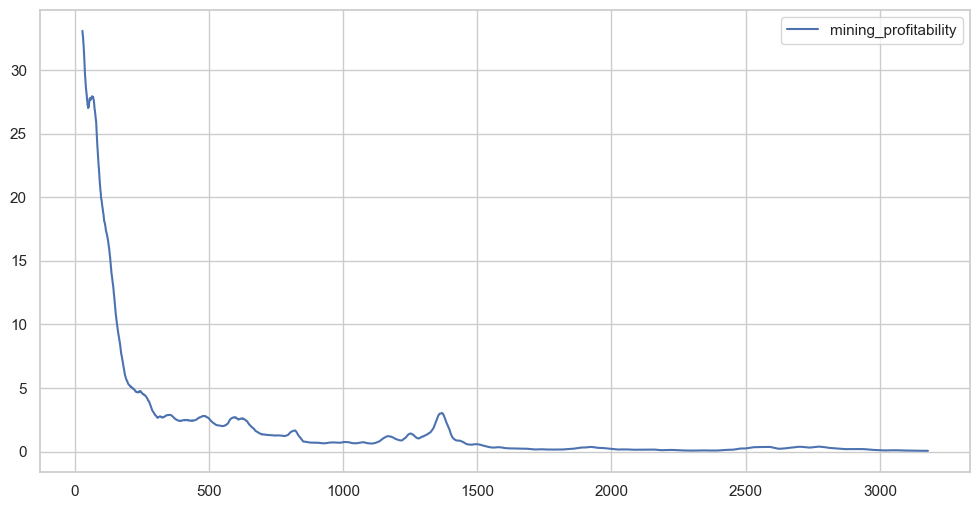

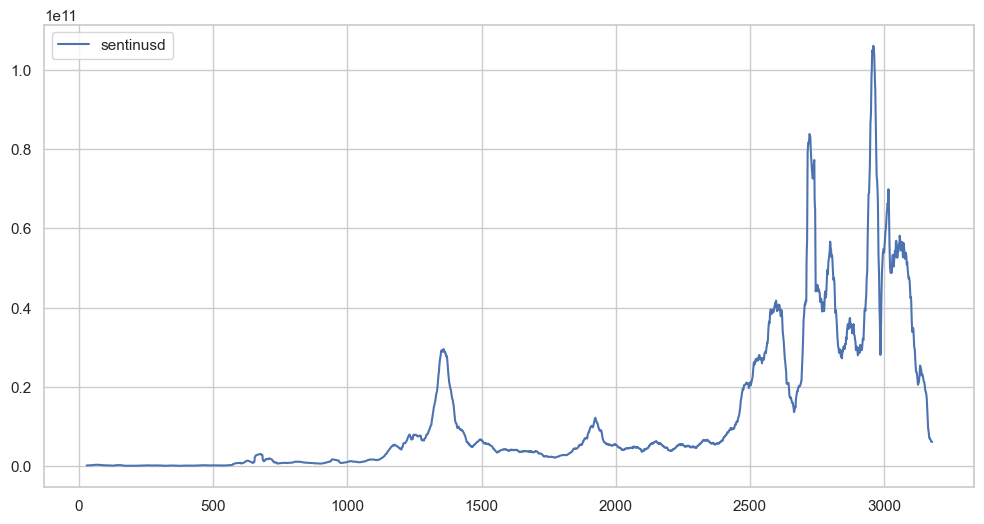

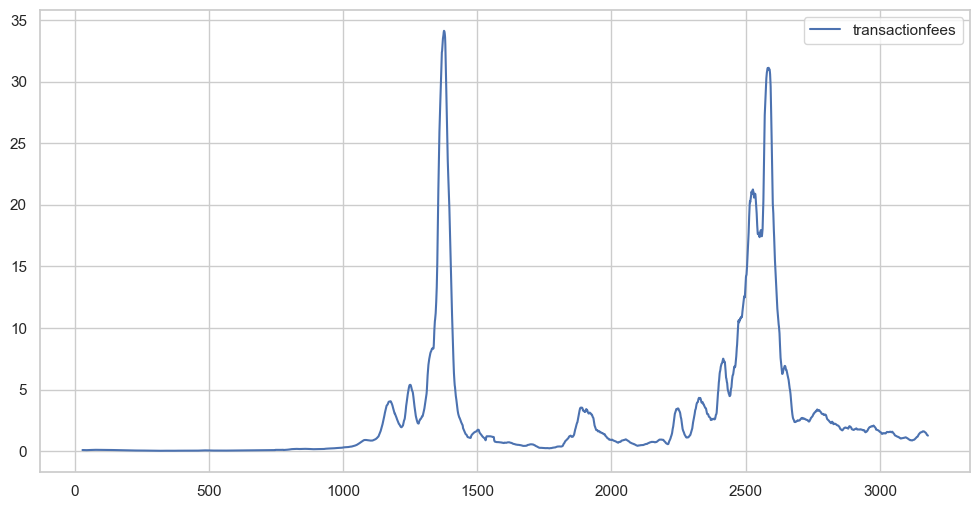

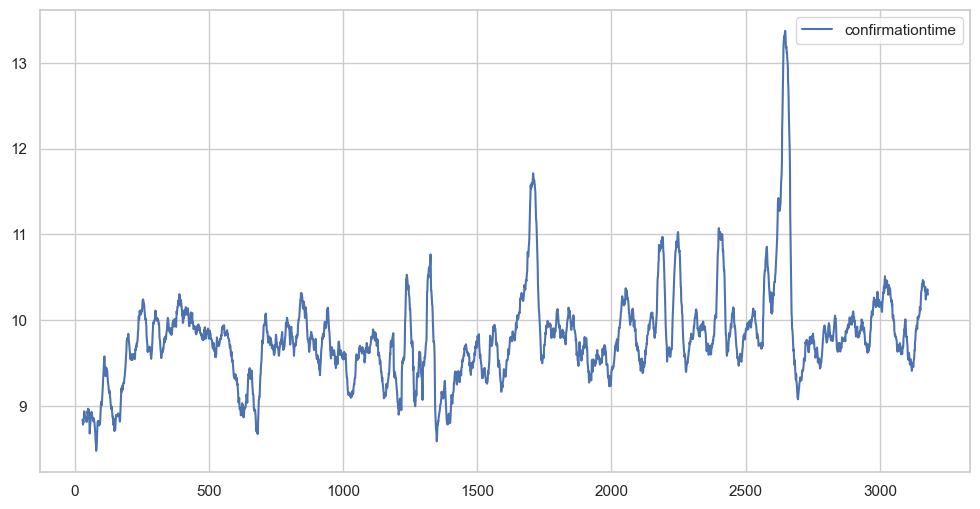

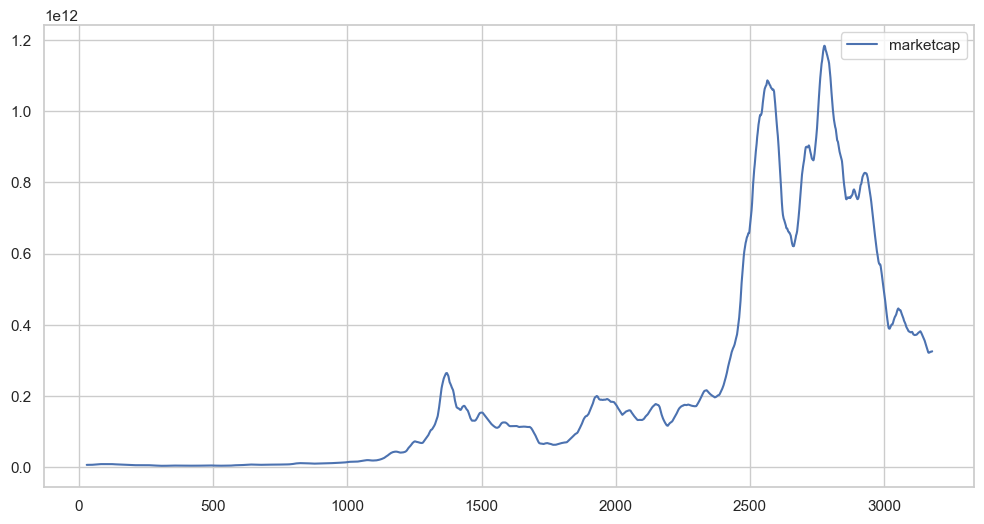

In [24]:
# Visulising the price of BTC 30 day average basis
features=list(X.columns)
for i in features:
    sns.set()
    sns.set_style('whitegrid')
    X[i].rolling(window=30).mean().plot(figsize=(12,6),label=i)
    plt.legend()
    plt.show()

In [25]:
estimators=[]
estimators.append(['minmax',MinMaxScaler(feature_range=(-1,1))])
scale=Pipeline(estimators)
X_min_max=scale.fit_transform(X)
y_min_max=scale.fit_transform(y)

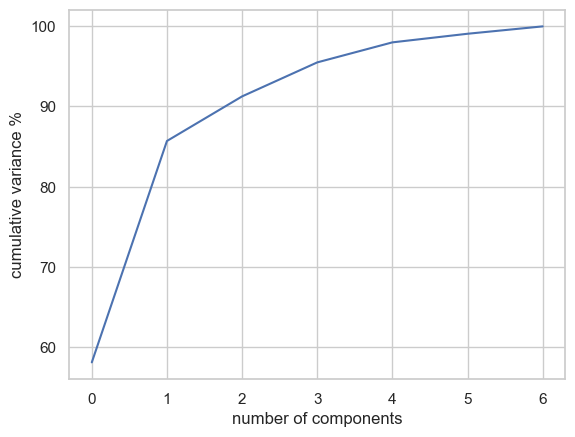

In [26]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0).fit(X_min_max)

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('number of components')
plt.ylabel('cumulative variance %')
plt.show()

In [27]:
np.cumsum(pca.explained_variance_ratio_)

array([0.58055051, 0.85692574, 0.91259584, 0.95503552, 0.98003744,
       0.99077874, 1.        ])

In [28]:
train_data_ = df[list(X_train.columns)]
train_data_['priceUSD'] = df['priceUSD']

C:\Users\share\AppData\Local\Temp\ipykernel_13764\4249142976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_['priceUSD'] = df['priceUSD']


In [29]:
train_data_

,marketcap,sentinusd,sentbyaddress,transactionfees,size,confirmationtime,mining_profitability,priceUSD
Date,,,,,,,,
2014-04-09,5587996110,2.392120e+08,122401,0.1390,243742.0,8.944,38.6780,447.110
2014-04-10,5020359905,3.103671e+08,124298,0.0864,254334.0,9.290,31.9170,407.703
2014-04-11,5068919648,2.927563e+08,117926,0.0858,223656.0,8.521,36.8140,403.328
2014-04-12,5329088351,1.572647e+08,87828,0.0811,169964.0,8.944,34.4980,425.310
2014-04-13,5150414718,1.547564e+08,94828,0.0840,162260.0,7.701,34.1410,415.876
...,...,...,...,...,...,...,...,...
2022-12-18,321956223728,3.493454e+09,439567,0.9120,511467.0,9.931,0.0650,16736.000
2022-12-19,320876529094,6.191116e+09,484919,1.1640,706111.0,10.588,0.0569,16679.000
2022-12-20,322974092809,6.787239e+09,510455,1.1280,665567.0,10.286,0.0630,16788.000


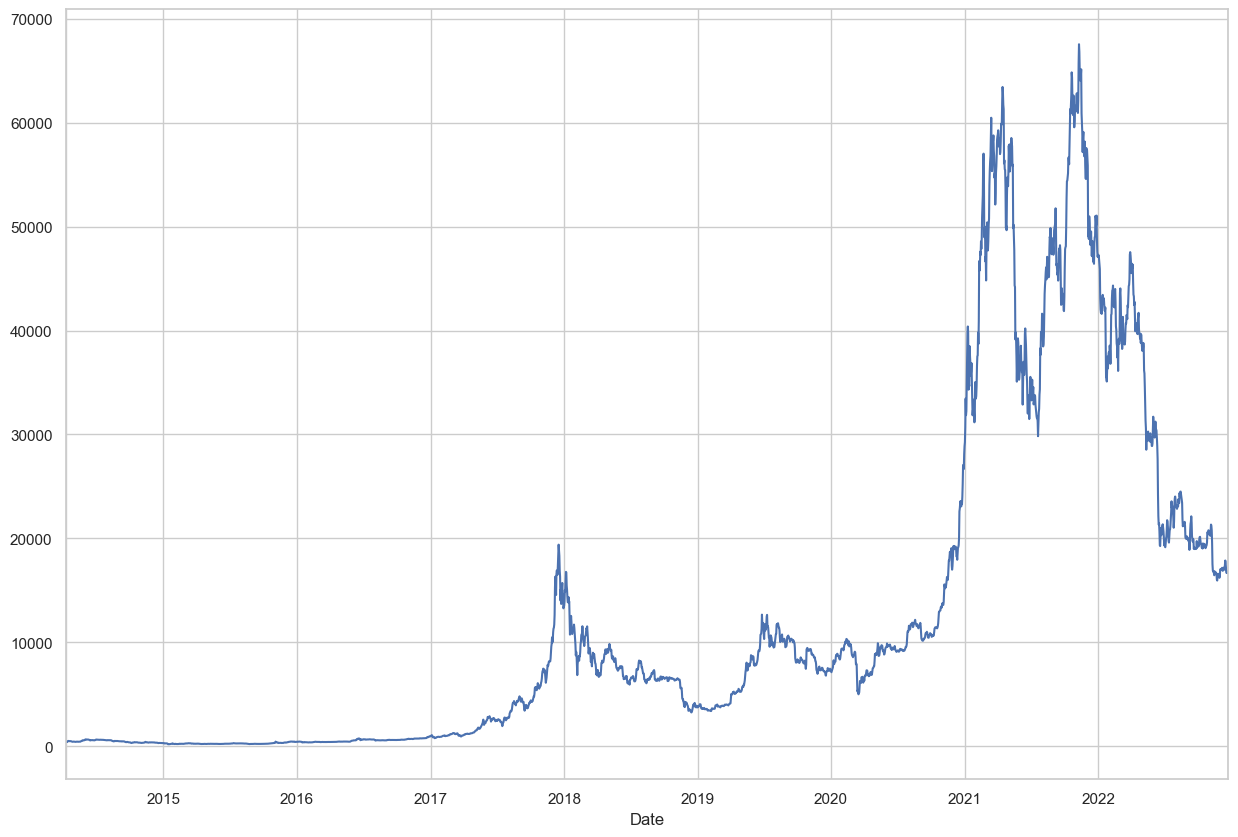

In [30]:
train_data_.sort_index()['2010':'2022']["priceUSD"].plot(subplots=True, figsize=(15,10))
plt.savefig('bitcoin.png')
plt.show()

# Percent change

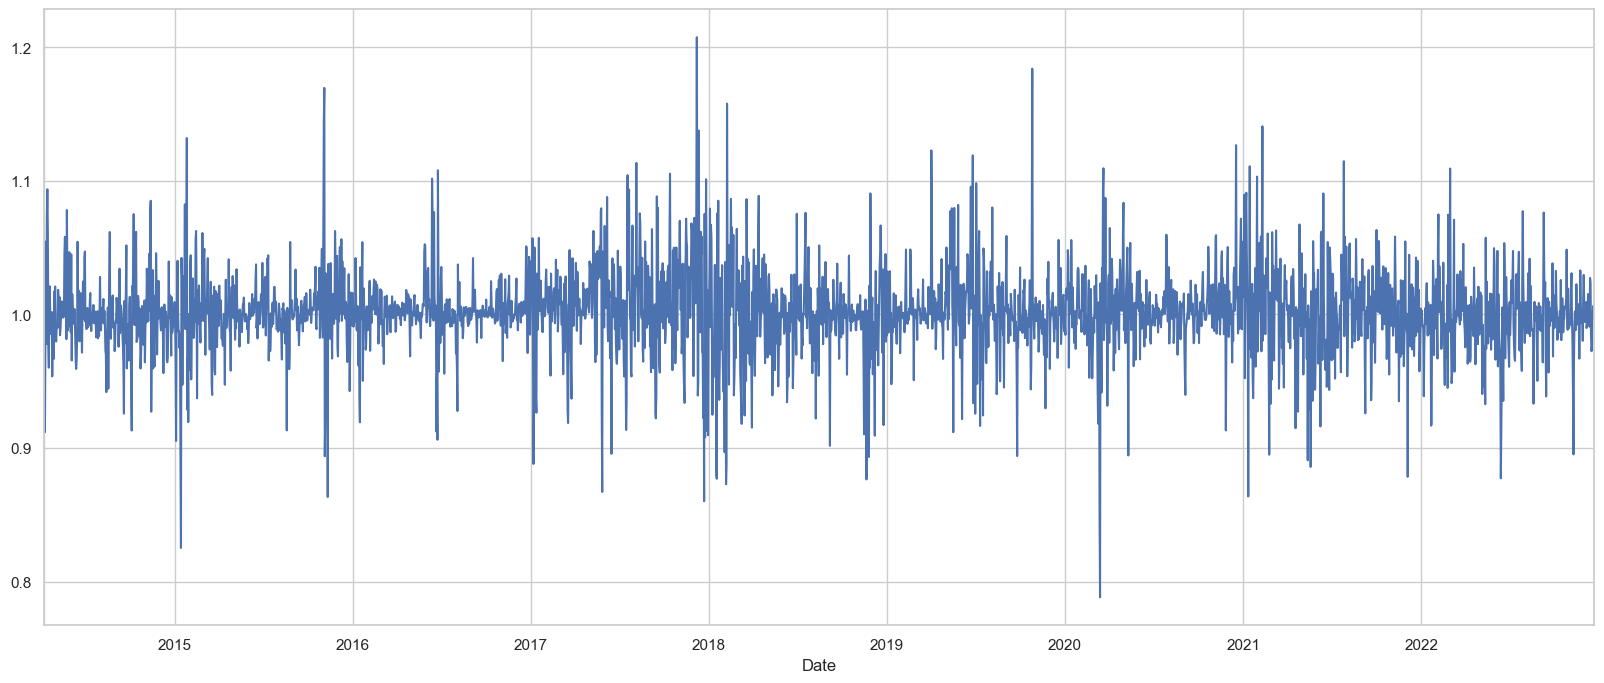

In [31]:
#train_data_['Change'] = train_data_.priceUSD.div(train_data_.priceUSD.shift())
train_data_ = train_data_.assign(Change=pd.Series(train_data_.priceUSD.div(train_data_.priceUSD.shift())))
train_data_['Change'].plot(figsize=(20,8))
plt.show()

# Expanding mean

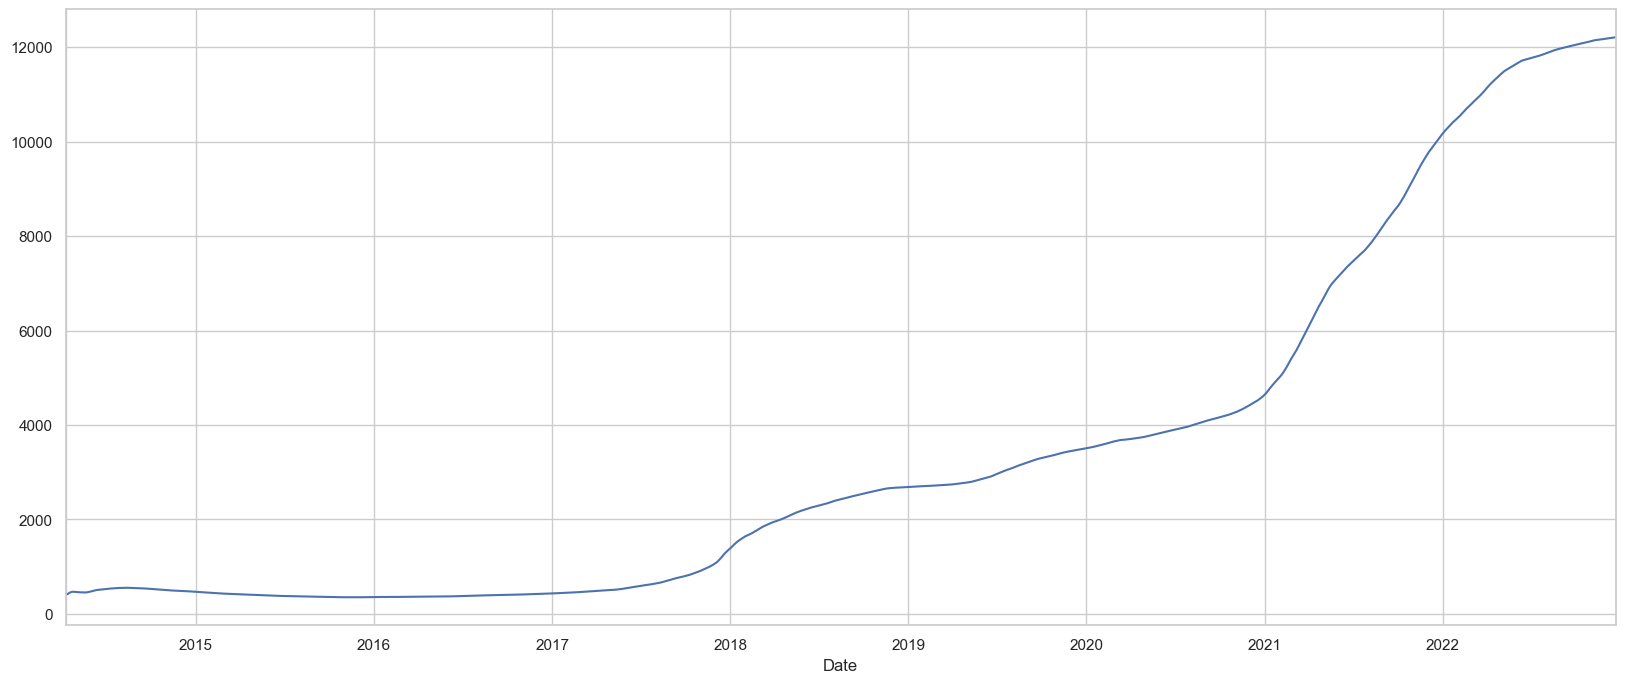

In [32]:
#train_data_['expanding_mean'] = train_data_['priceUSD'].expanding(1).mean()
train_data_ = train_data_.assign(expanding_mean=pd.Series(train_data_['priceUSD'].expanding(1).mean()))
train_data_['expanding_mean'].plot(figsize=(20,8))
plt.show()

# Lag feature

In [33]:
train_data_['lag_1'] = train_data_['priceUSD'].shift(1)
train_data_['lag_2'] = train_data_['priceUSD'].shift(2)
train_data_['lag_3'] = train_data_['priceUSD'].shift(3)
train_data_['lag_4'] = train_data_['priceUSD'].shift(4)
train_data_['lag_5'] = train_data_['priceUSD'].shift(5)
train_data_['lag_6'] = train_data_['priceUSD'].shift(6)
train_data_['lag_7'] = train_data_['priceUSD'].shift(7)

# Return

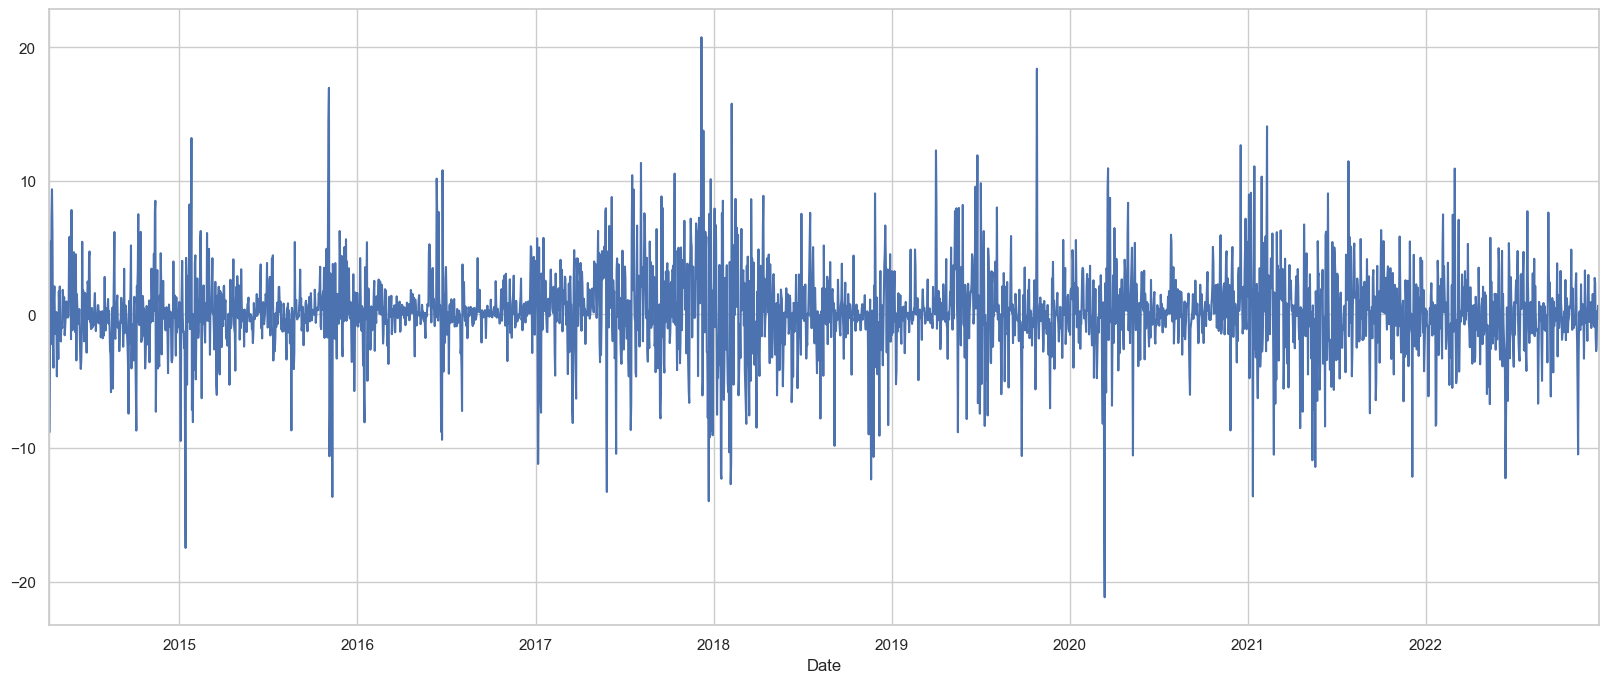

In [34]:
train_data_ = train_data_.assign(Return=pd.Series(train_data_.Change.sub(1).mul(100)))
train_data_['Return'].plot(figsize=(20,8))
plt.show()

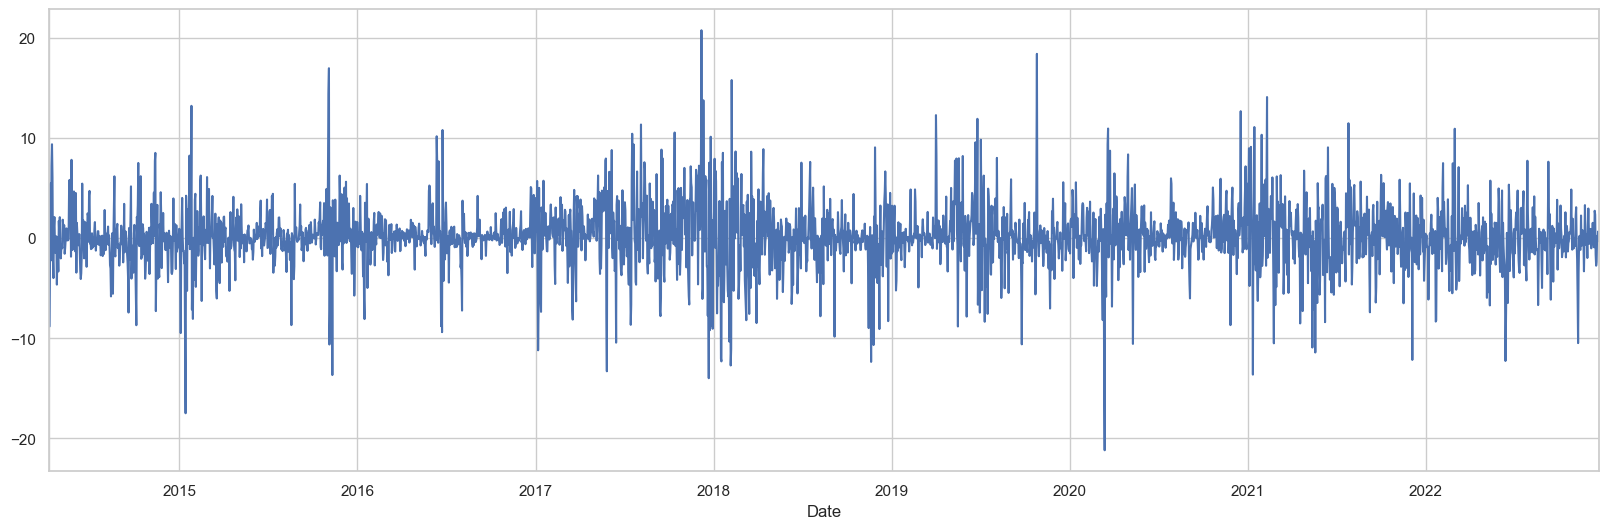

In [35]:
train_data_.priceUSD.pct_change().mul(100).plot(figsize=(20,6))
plt.show()

# Window functions

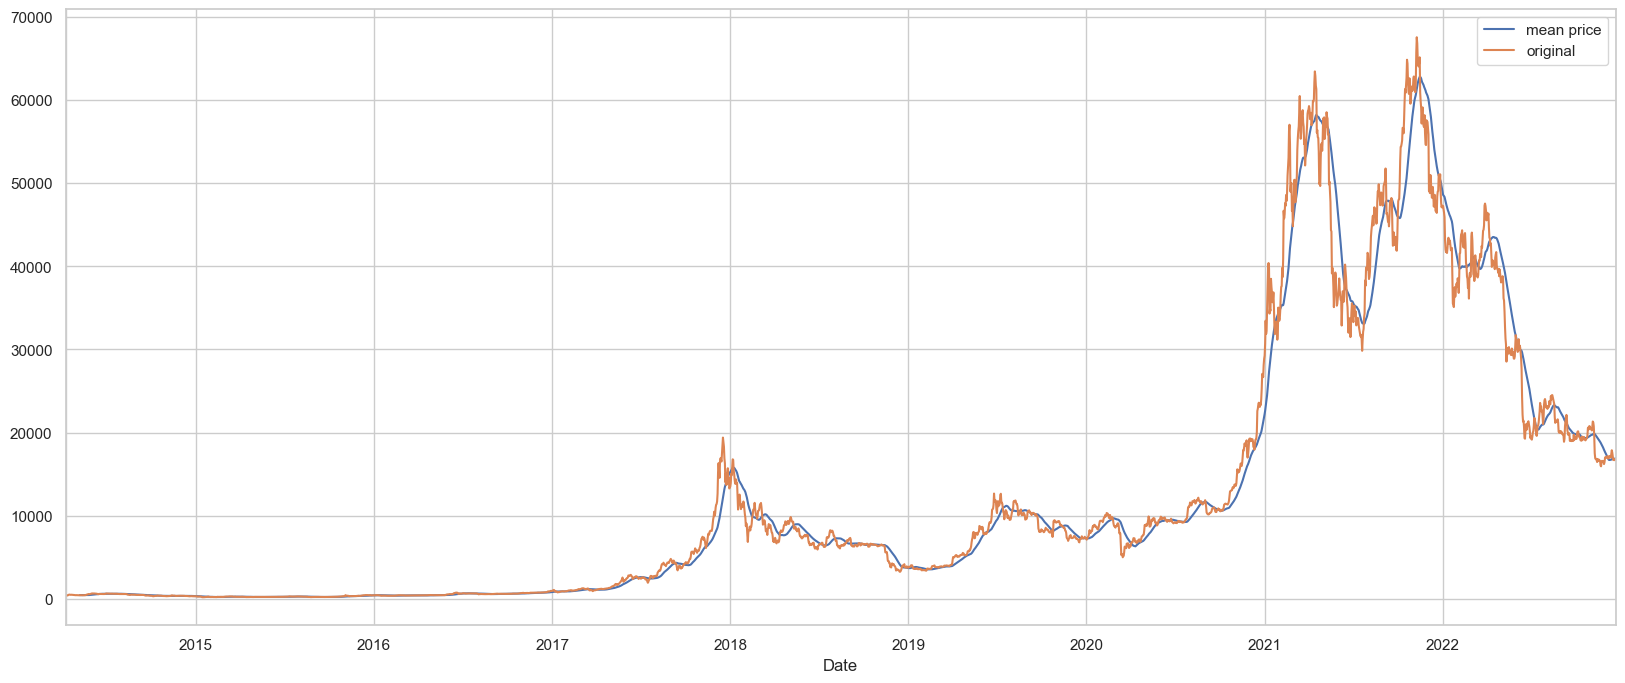

In [36]:
train_data_ = train_data_.assign(Mean=pd.Series(train_data_['priceUSD'].rolling(window=30).mean()))
train_data_['Mean'].plot(figsize=(20,8),label='mean price')
train_data_['priceUSD'].plot(label='original')
plt.legend()
plt.show()

# Time series decomposition and Random walks

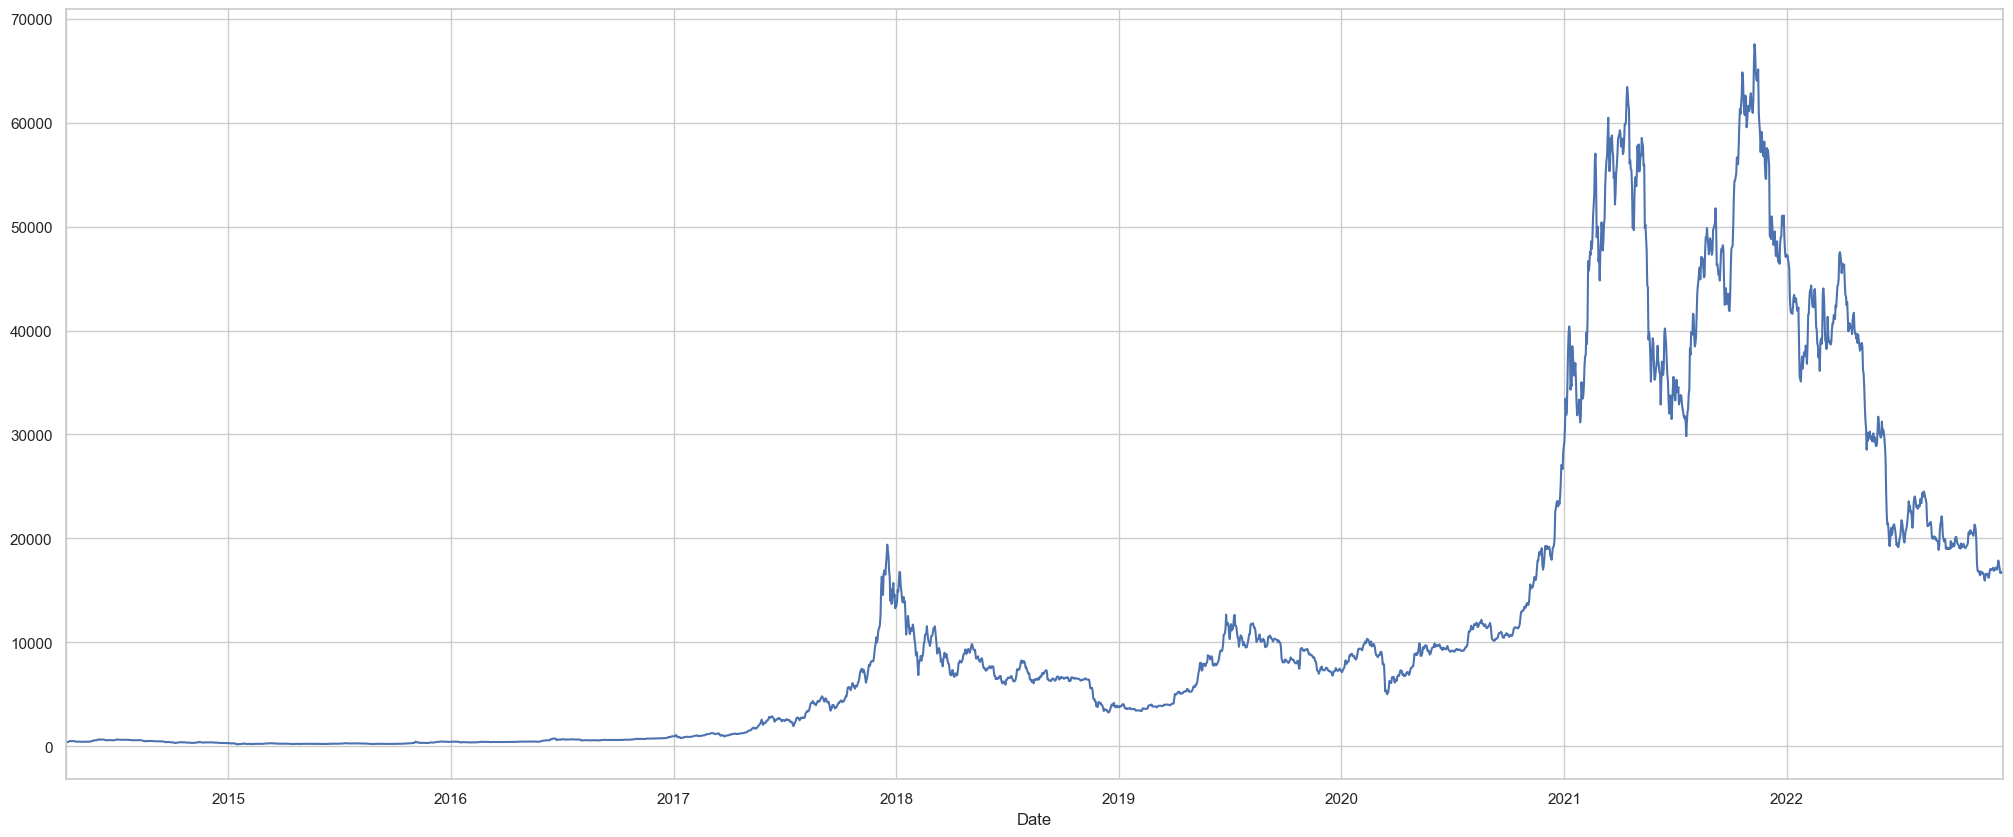

In [37]:
train_data_["priceUSD"].plot(figsize=(25,10))
plt.show()

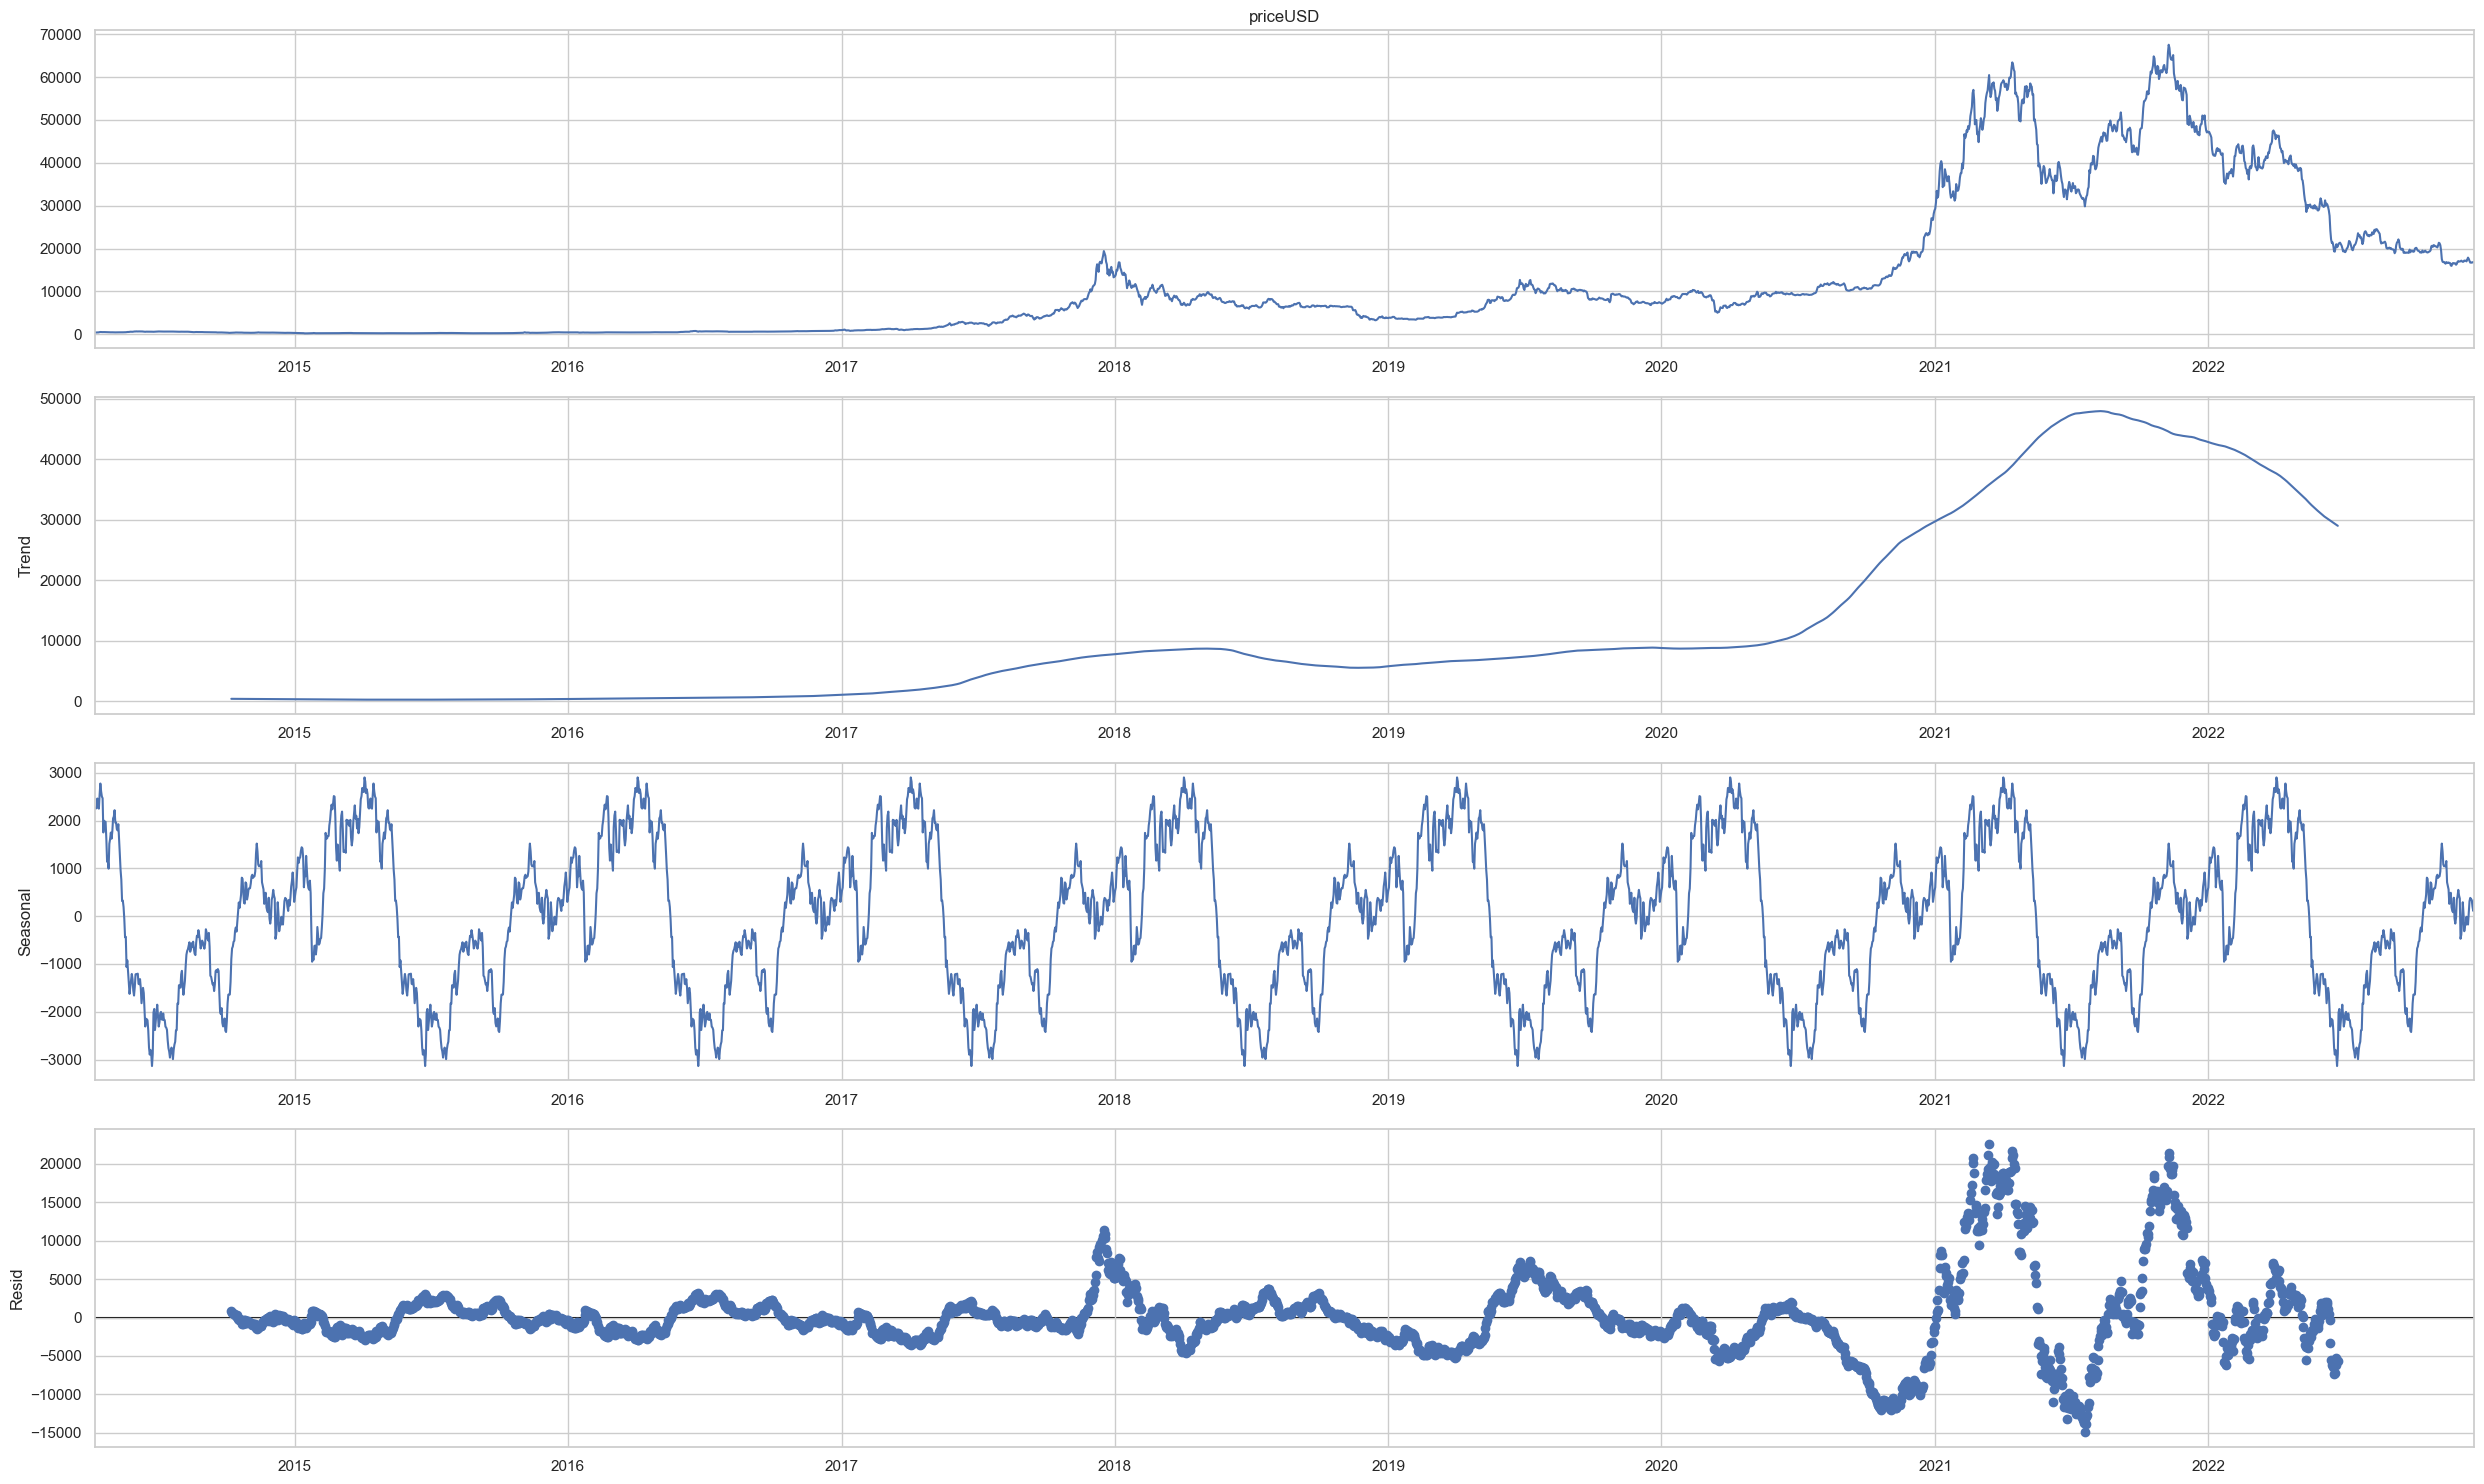

In [38]:
# Now, for decomposition...
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 25, 15
decomposed_train_data_ = sm.tsa.seasonal_decompose(train_data_["priceUSD"],period=365) # The frequncy is annual
figure = decomposed_train_data_.plot()
plt.show()

In [39]:
train_data_.isnull().values.any()

True

In [40]:
train_data_.dropna(axis = 0, how ='any',inplace=True)
train_data_.isnull().values.any()

False

In [41]:
train_data_["priceUSD"].describe()

count     3151.000000
mean     12318.827153
std      16040.831134
min        197.577000
25%        610.599500
50%       6610.000000
75%      15581.500000
max      67547.000000
Name: priceUSD, dtype: float64

Text(0.5, 1.0, 'detrended by subtracting the least squares fit')

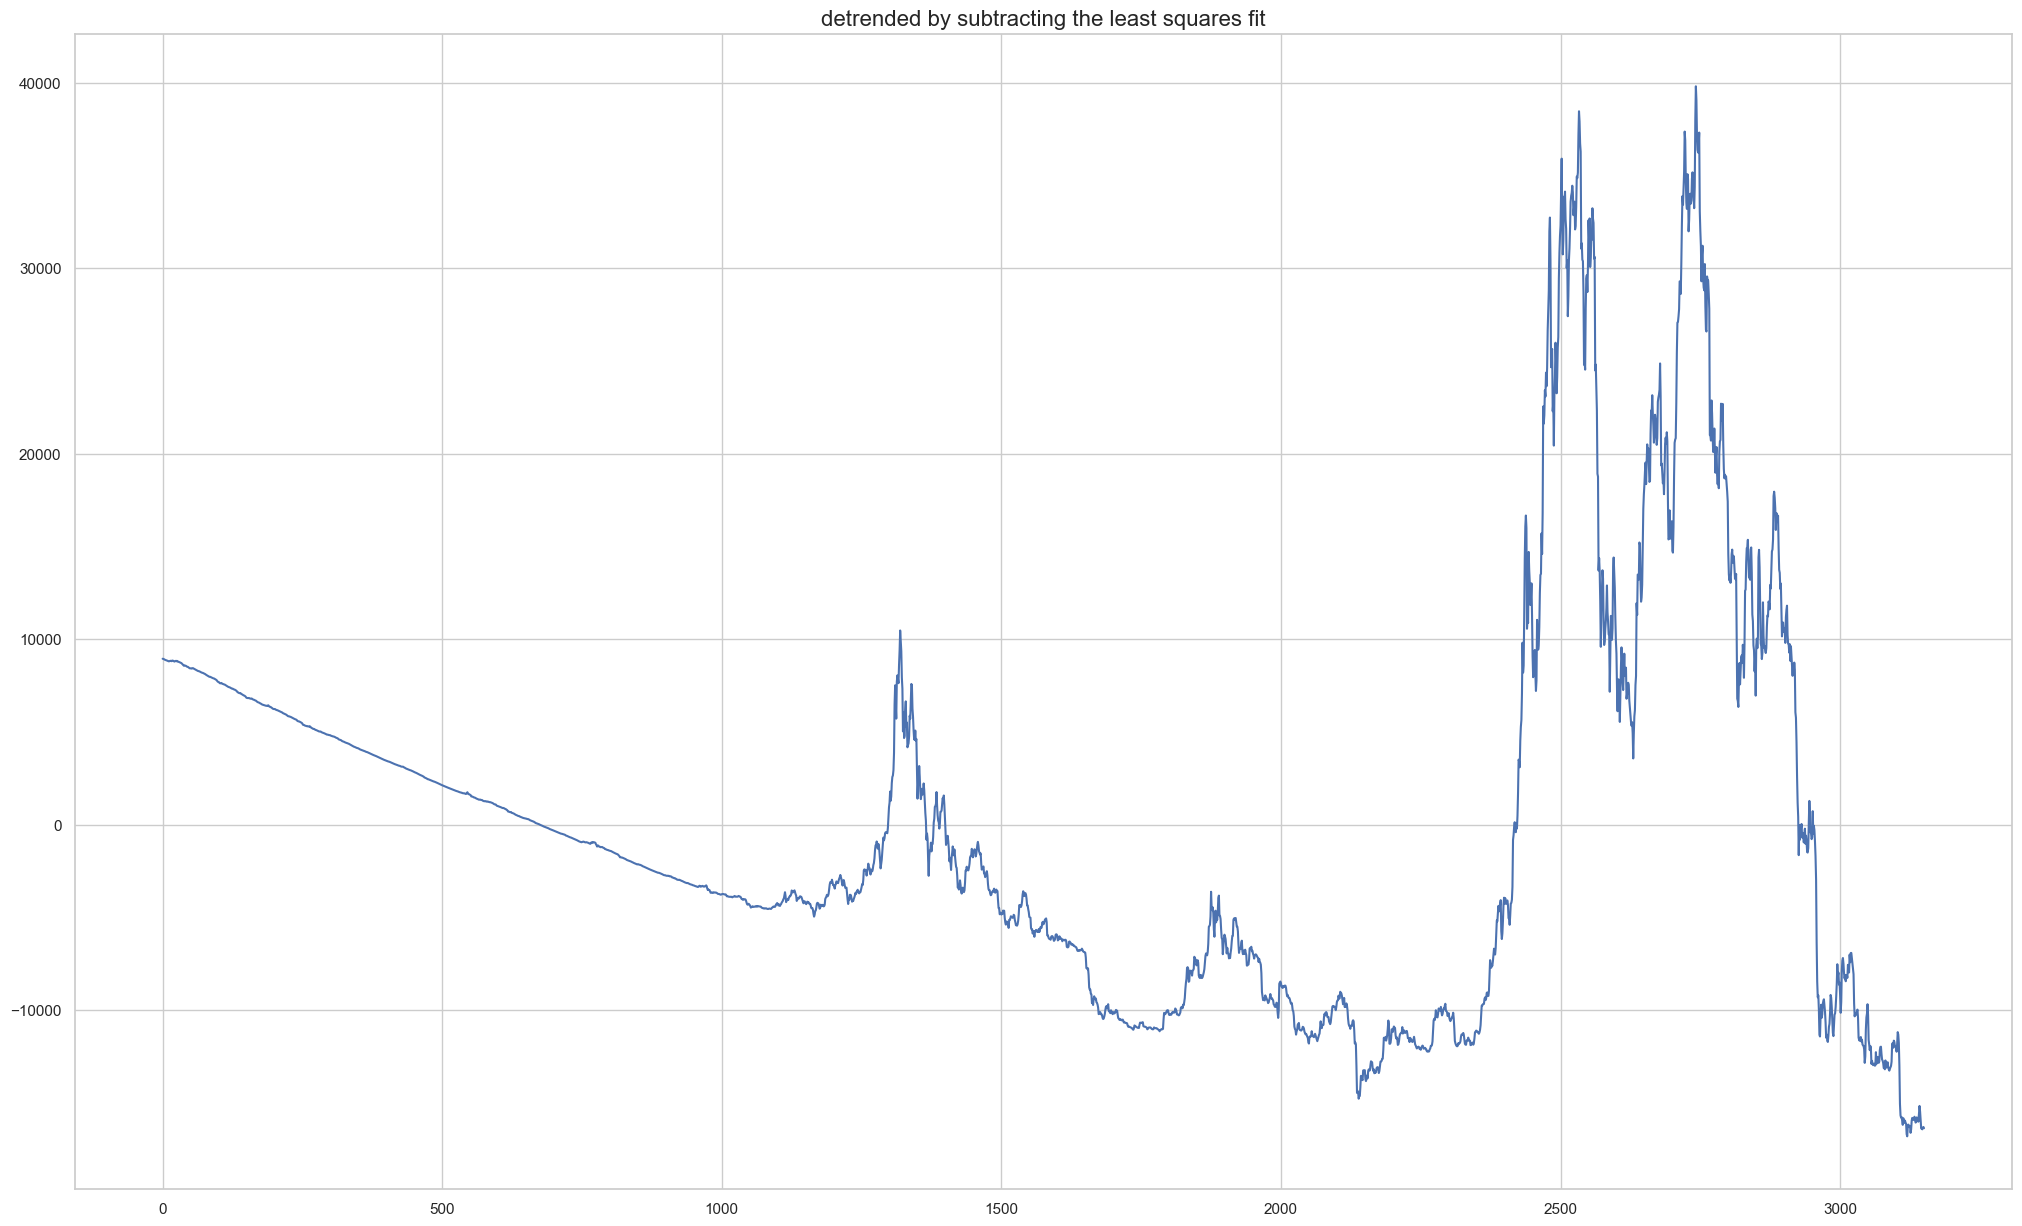

In [42]:

from scipy import signal
detrended = signal.detrend(train_data_["priceUSD"].values)
plt.plot(detrended)
plt.title('detrended by subtracting the least squares fit', fontsize=16)



In [43]:
# Plotting white noise
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
series = Series(train_data_["priceUSD"])
# summary stats
print(train_data_["priceUSD"].describe())

count     3151.000000
mean     12318.827153
std      16040.831134
min        197.577000
25%        610.599500
50%       6610.000000
75%      15581.500000
max      67547.000000
Name: priceUSD, dtype: float64


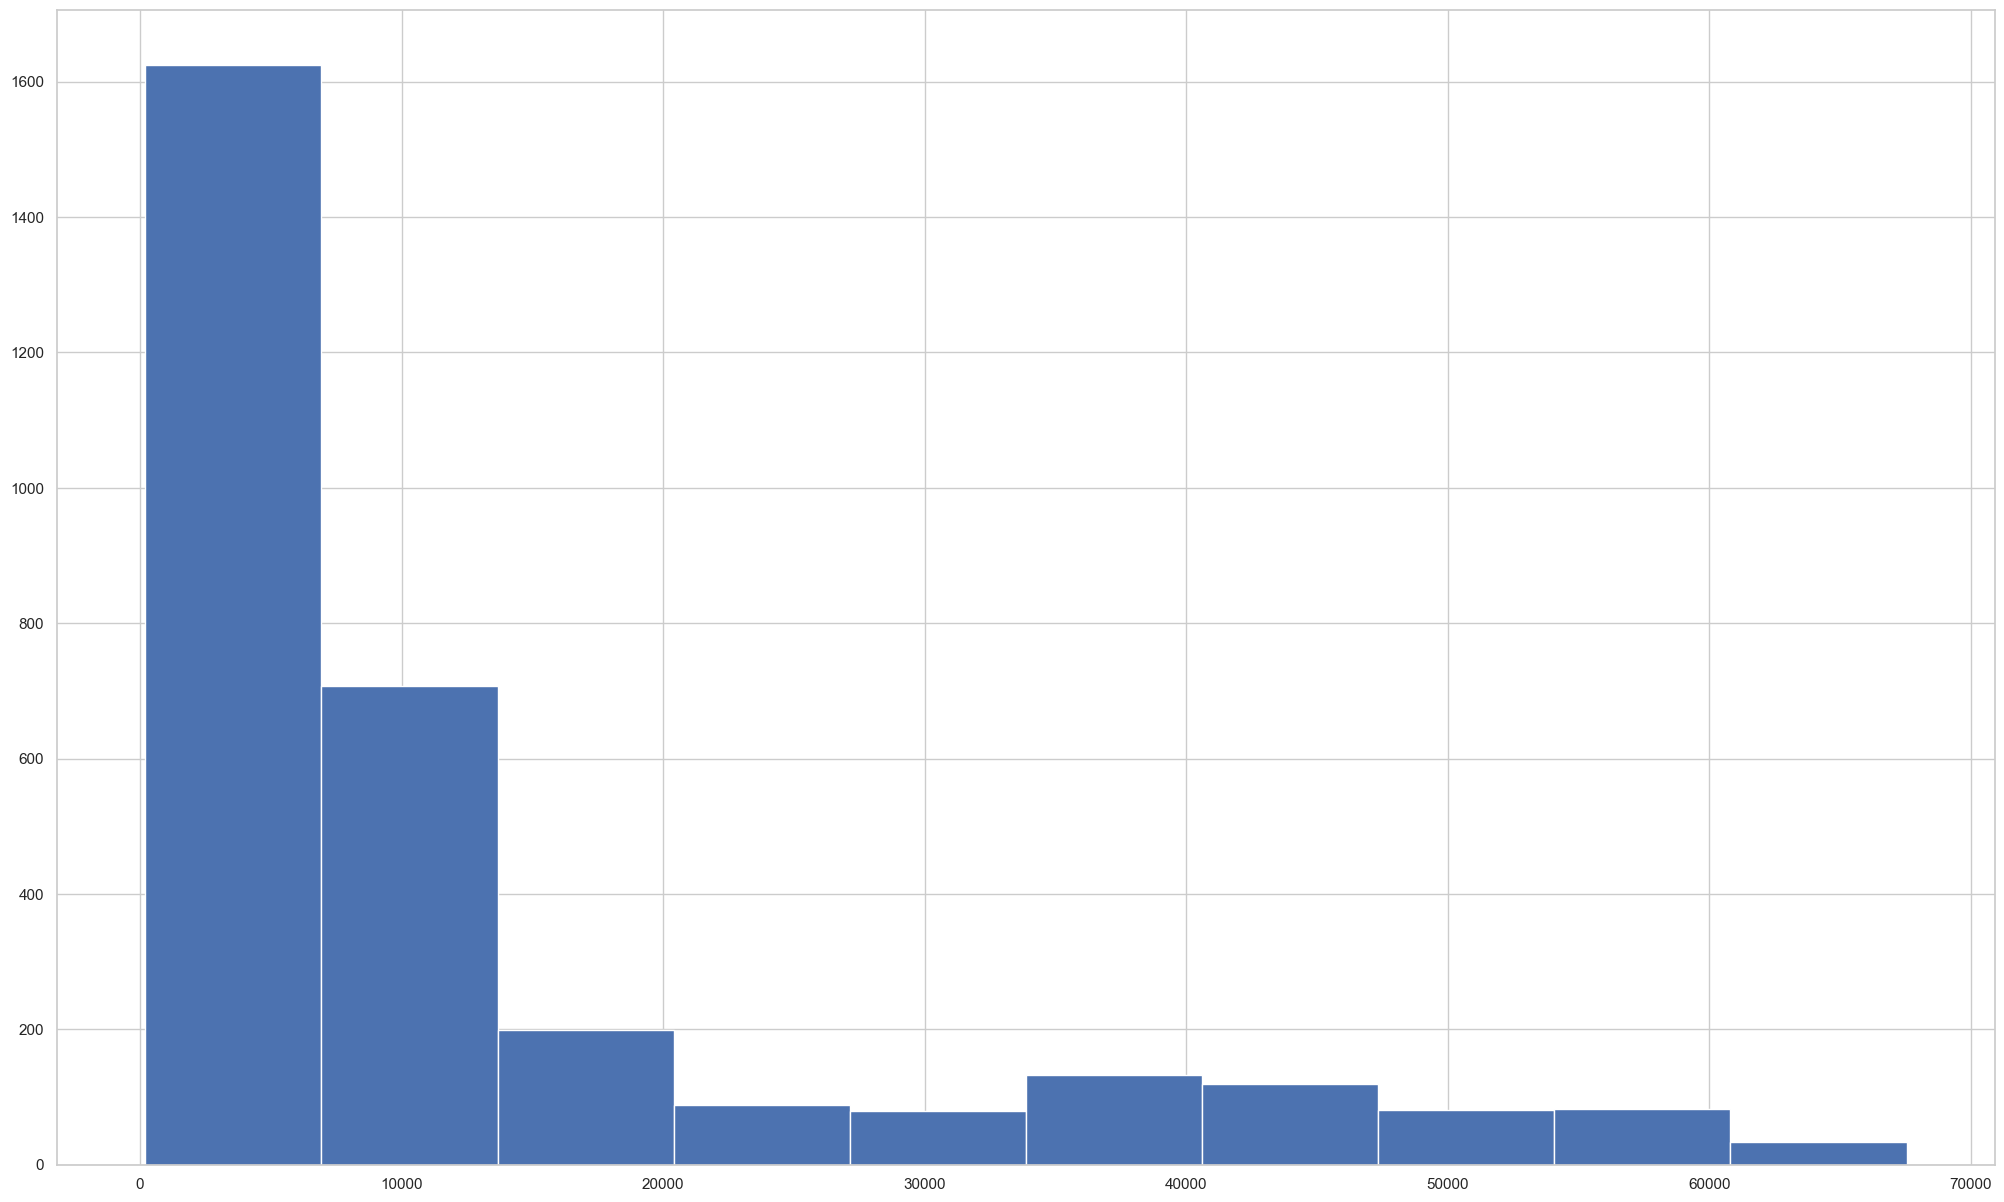

In [44]:
# histogram plot
series.hist()
plt.show()

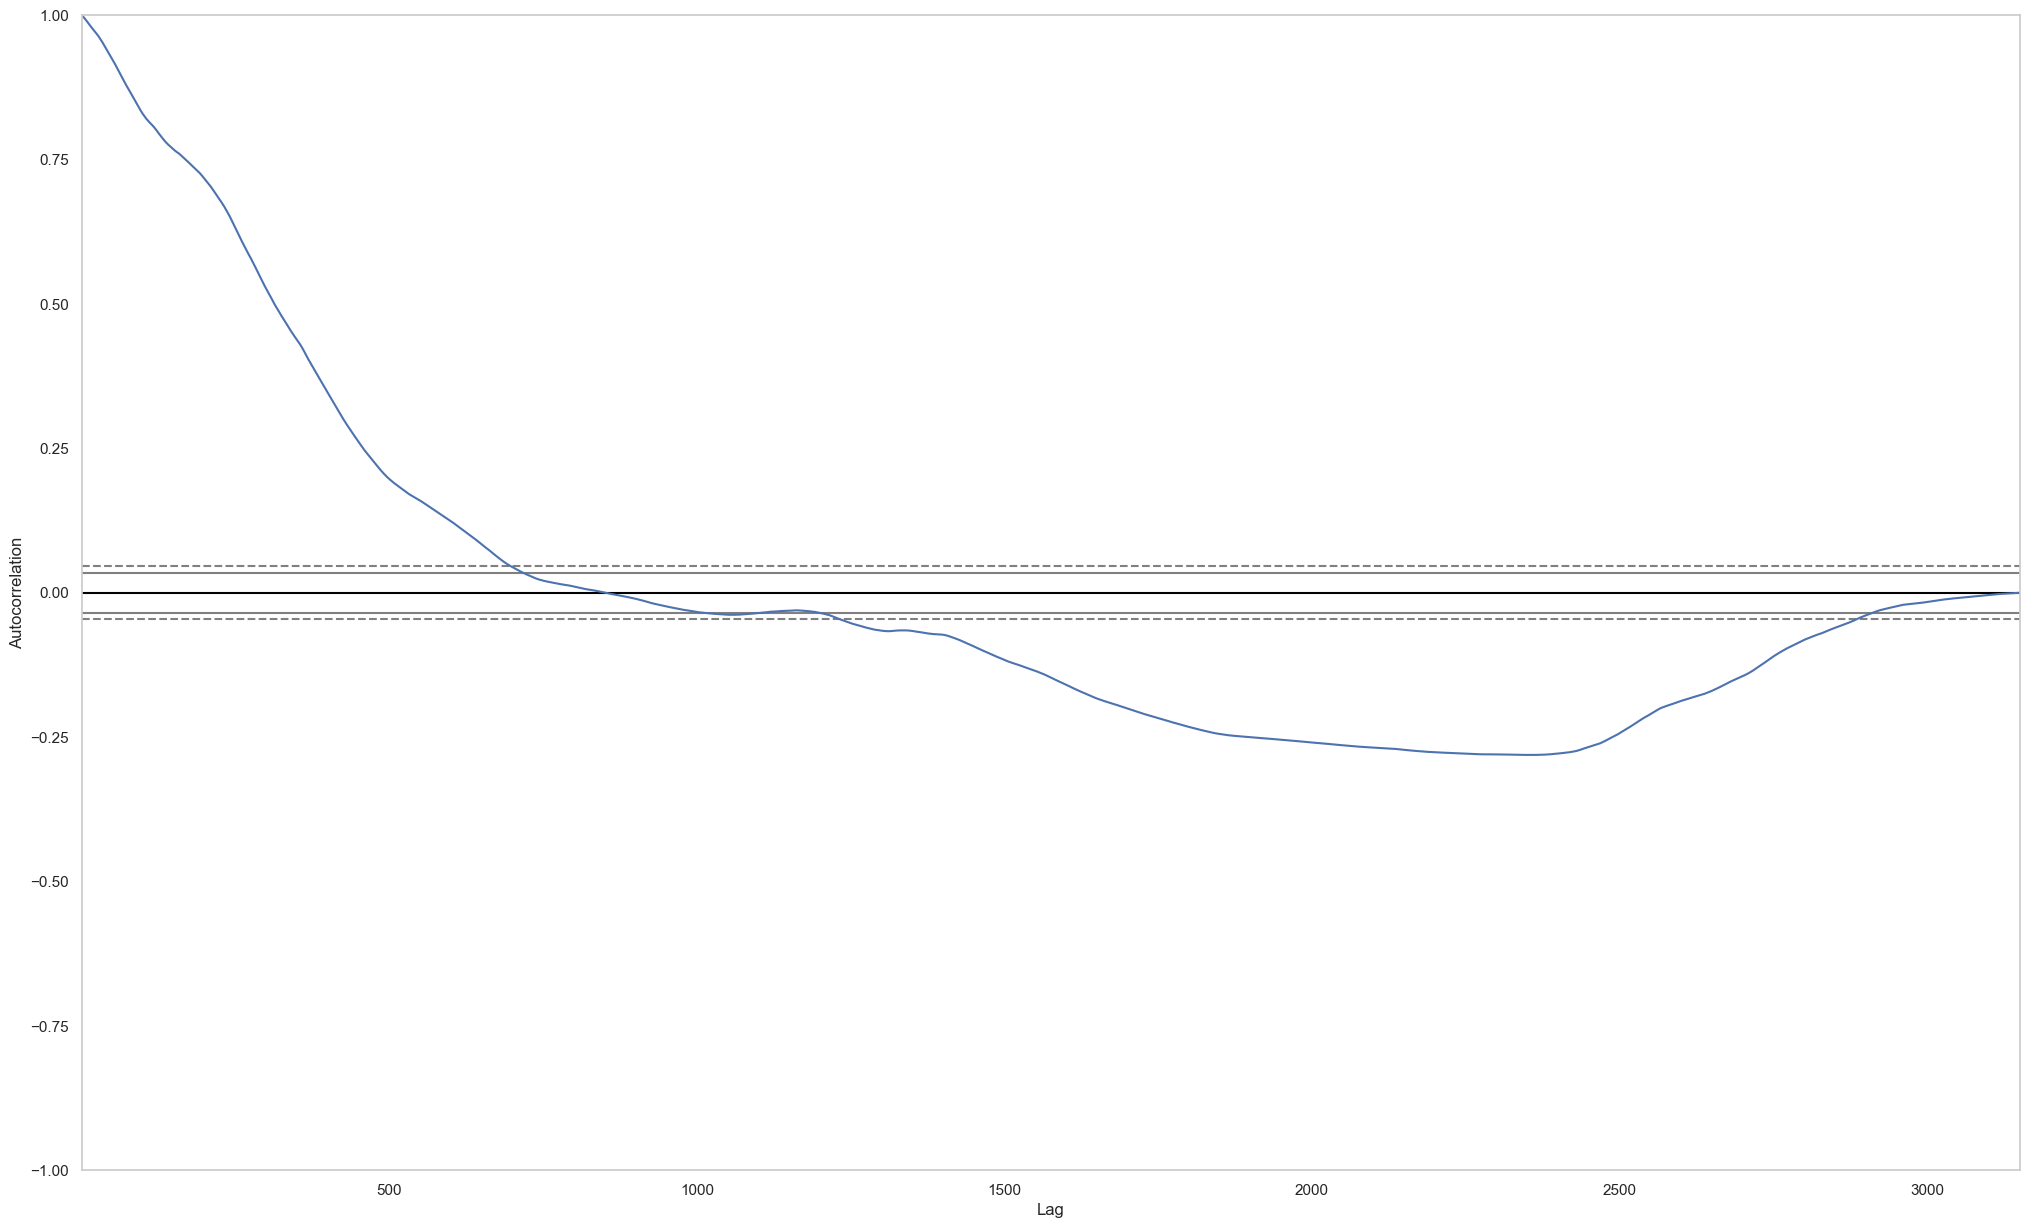

In [45]:
# autocorrelation
autocorrelation_plot(series)
plt.show()

C:\Users\share\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


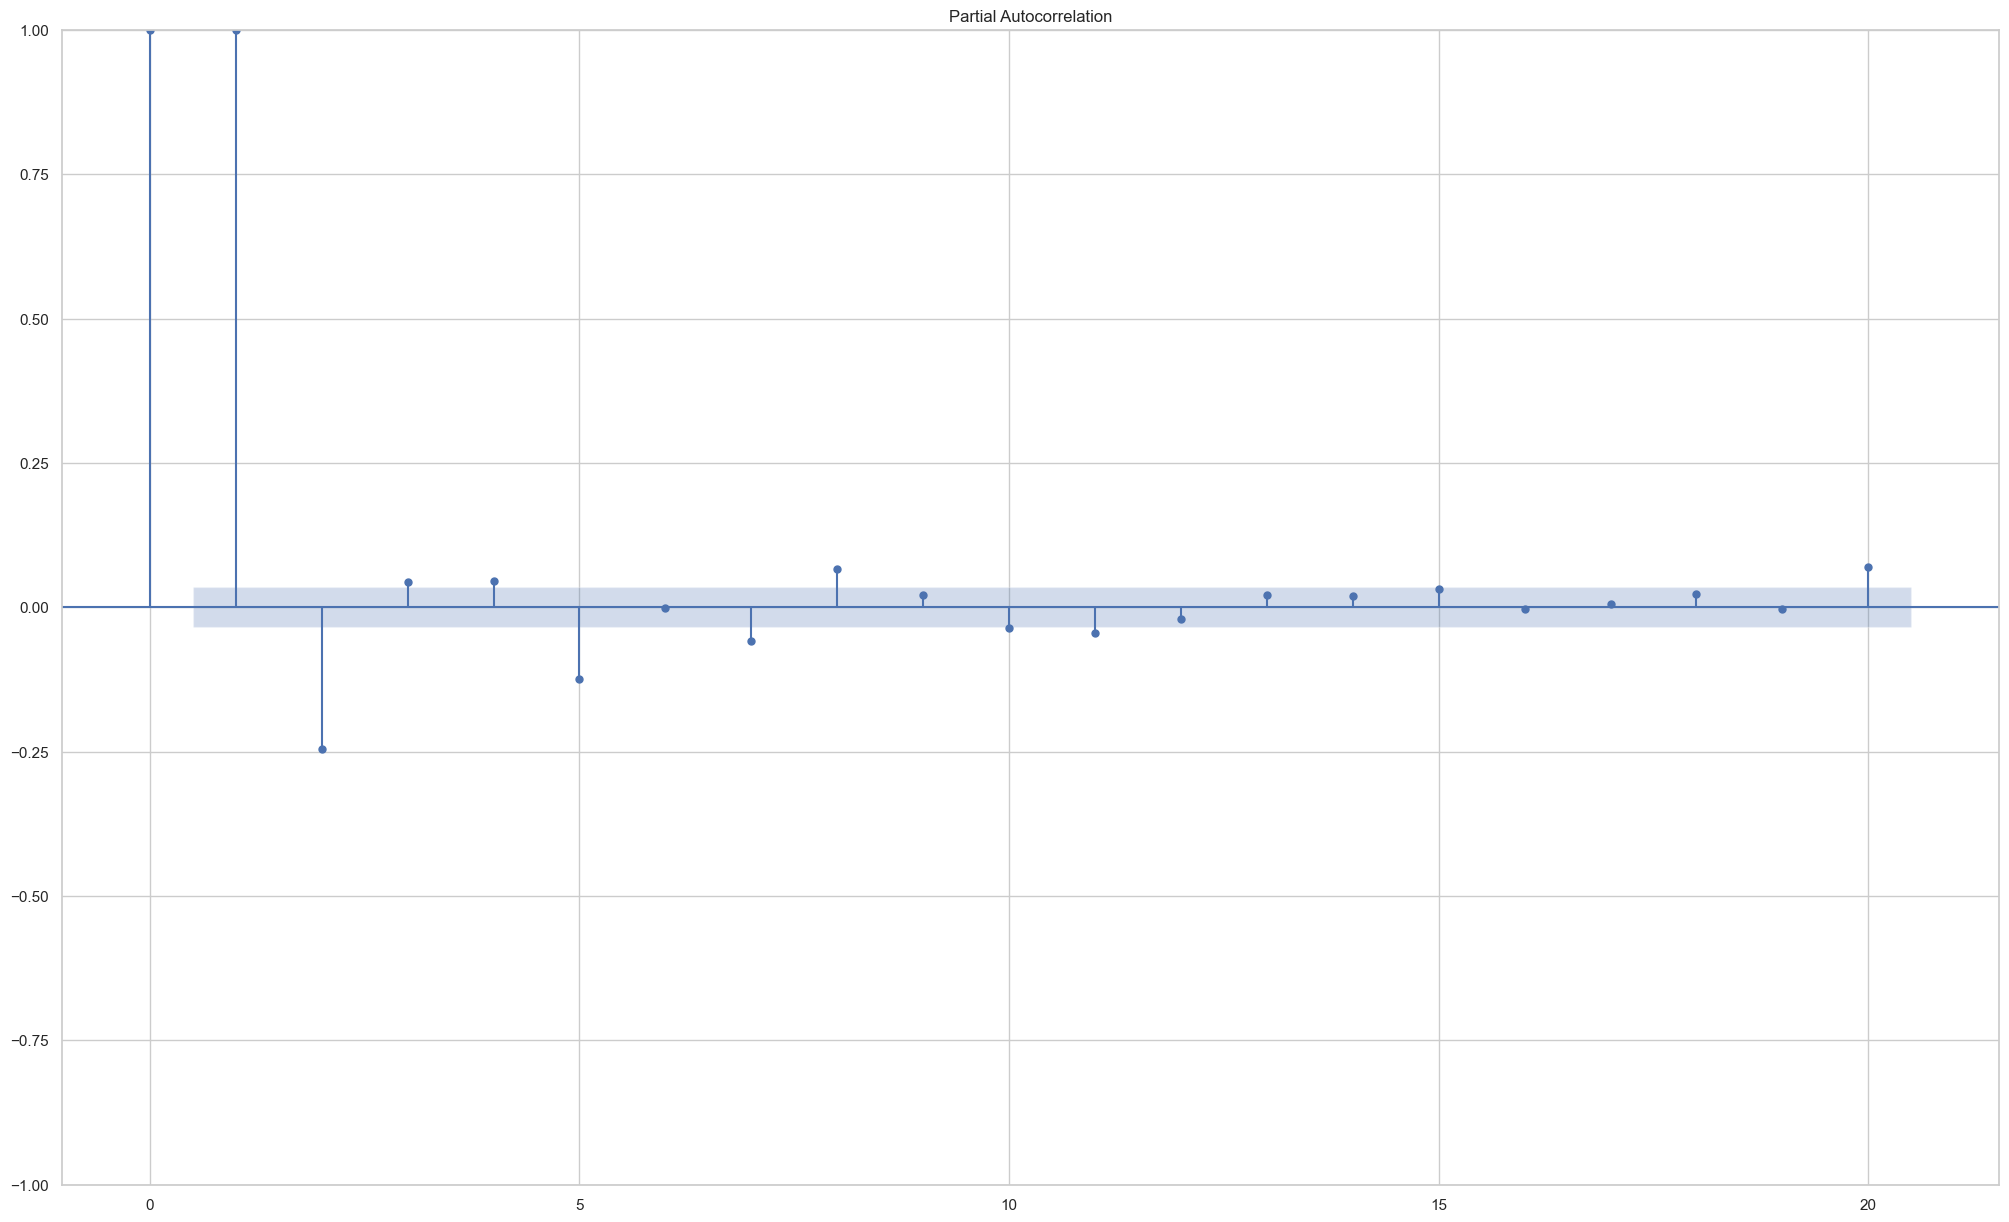

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(train_data_["priceUSD"],lags=20)
plt.show()

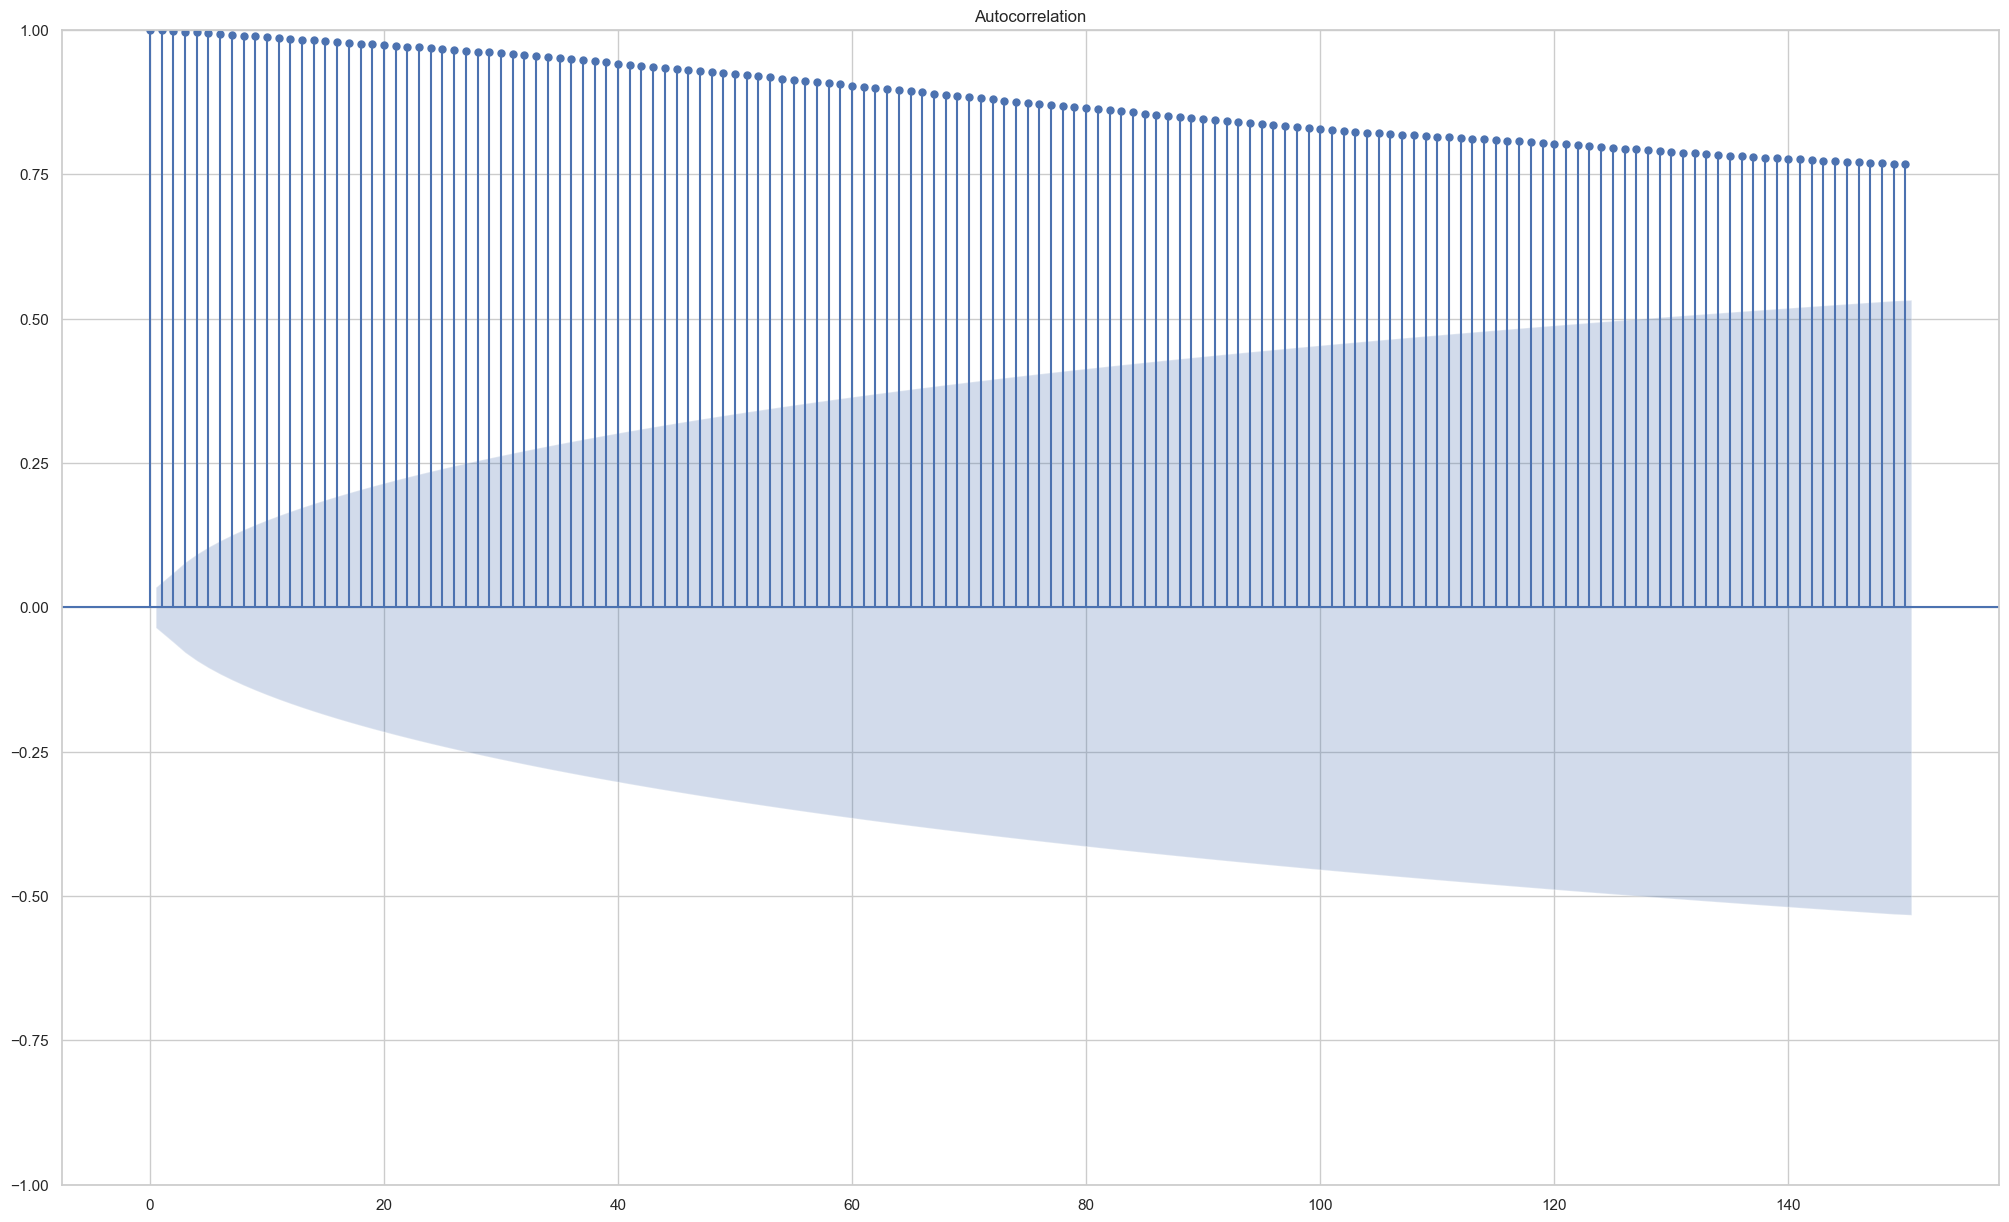

In [47]:
# Plotting autocorrelation of white noise
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train_data_["priceUSD"],lags=150,alpha=0.05)
plt.show()

The partial autocorrelation function shows a high correlation with the first lag and lesser correlation with the second and third lag. The autocorrelation function shows a slow decay, which means that the future values have a very high correlation with its past values.

As we can see, the time series contains significant auto-correlations up through lags 130

In [48]:
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(train_data_["priceUSD"], lags=[140], boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
140,355325.032567,0.0,347803.267446,0.0


The value 256068.08656797 is the test statistic of the Box-Pierce test and 0.0 is its p-value as per the Chi-square(k=140) tables.
As we can see, both p-values are less than 0.01 and so we can say with 99% confidence that the time series is not pure white noise.

## Random Walk

In [49]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
#https://www.statsmodels.org/dev/_modules/statsmodels/tsa/stattools.html
from statsmodels.tsa.stattools import adfuller
adf = adfuller(train_data_["priceUSD"])
print("p-value : {}".format(float(adf[1])))

p-value : 0.45770179486030144


## Generating a random walk

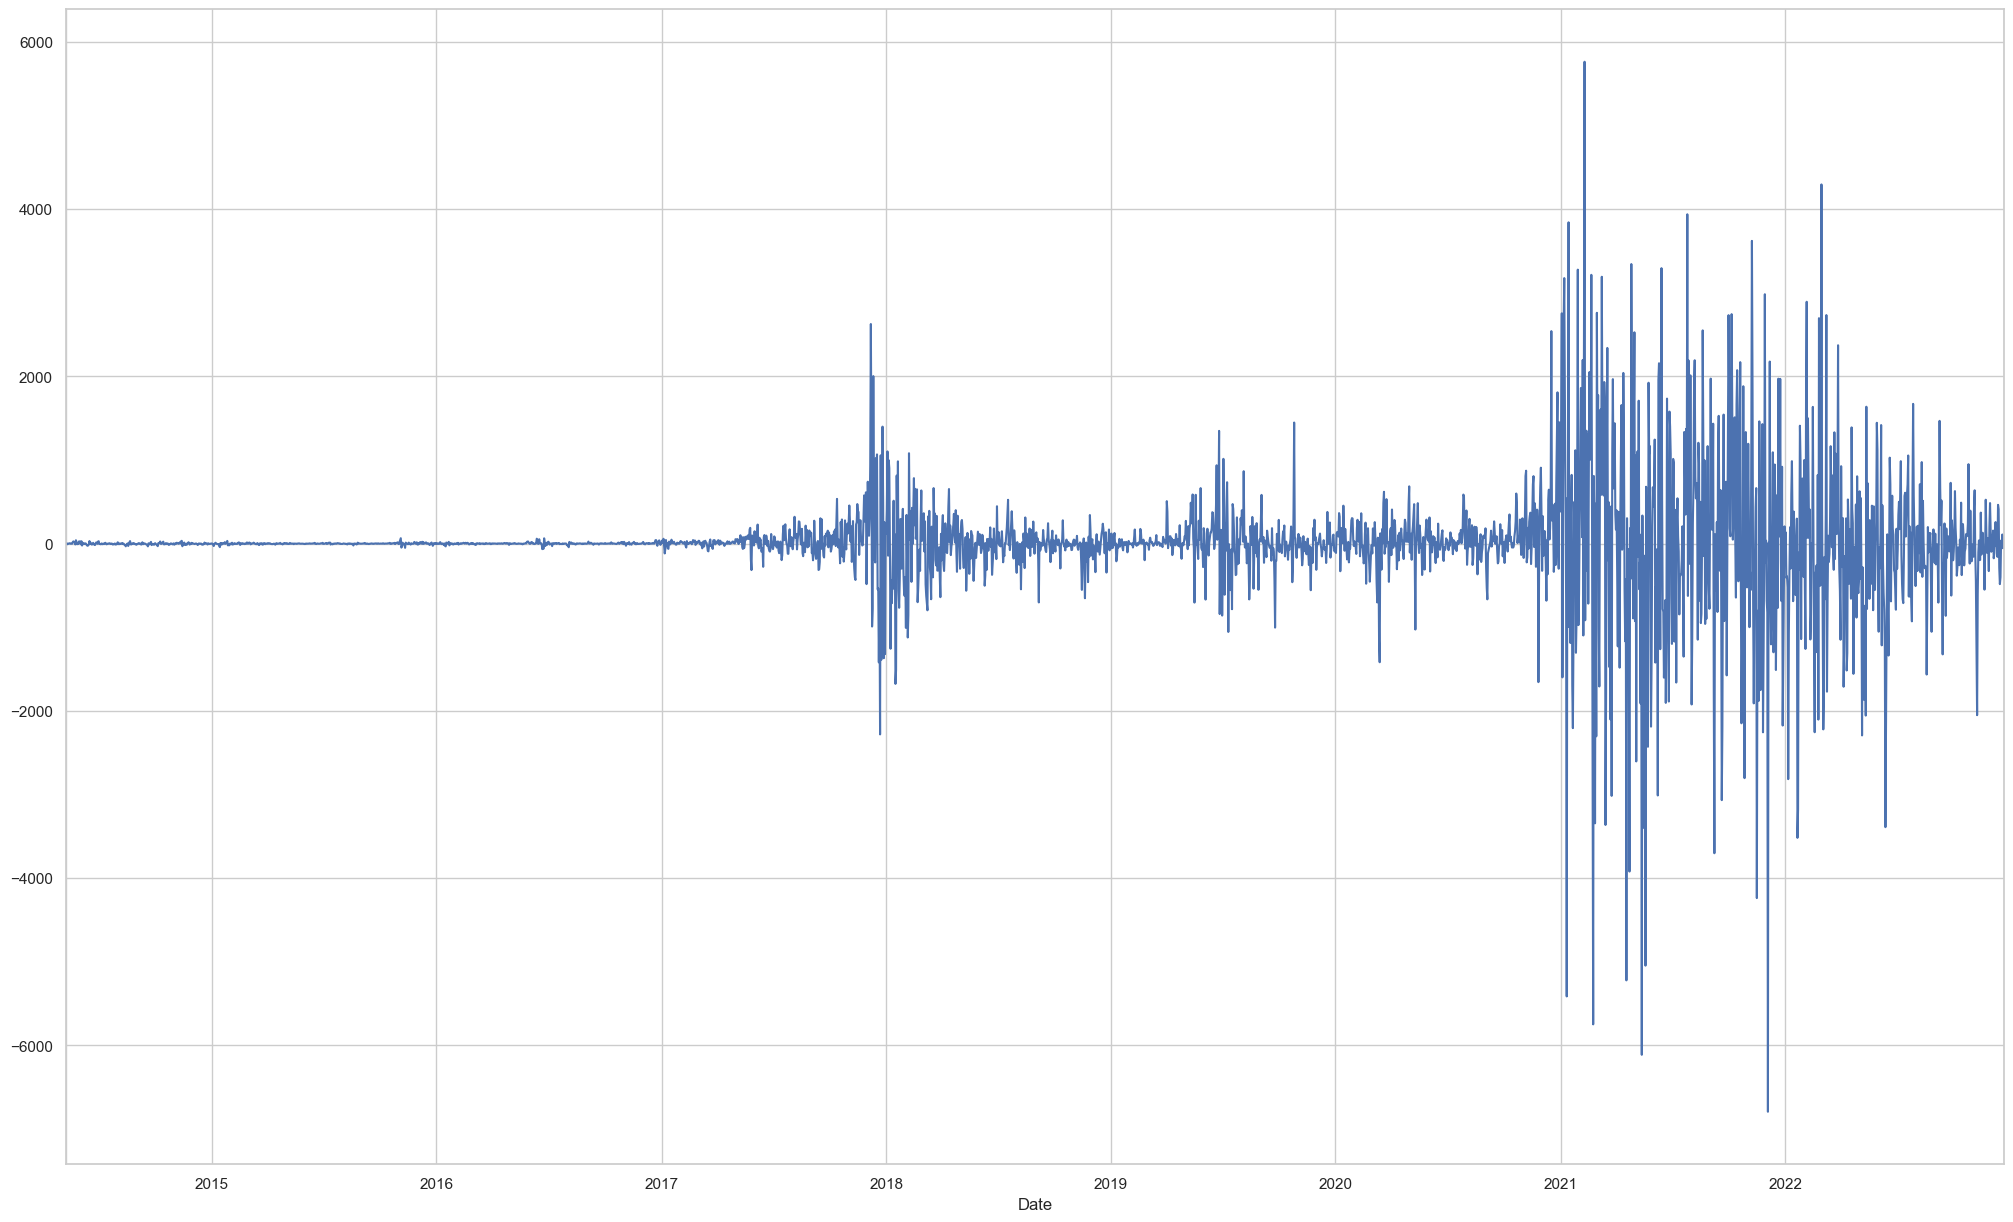

In [50]:
diff_Y_i = train_data_["priceUSD"].diff()
train_data_ = train_data_.assign(difference=pd.Series(diff_Y_i))

#drop the NAN in the first row
diff_Y_i = diff_Y_i.dropna()
diff_Y_i.plot()
plt.show()

In [51]:
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(diff_Y_i, lags=[140], boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
140,641.071626,3.715771e-65,628.994082,4.216818e-63


## Stationarity

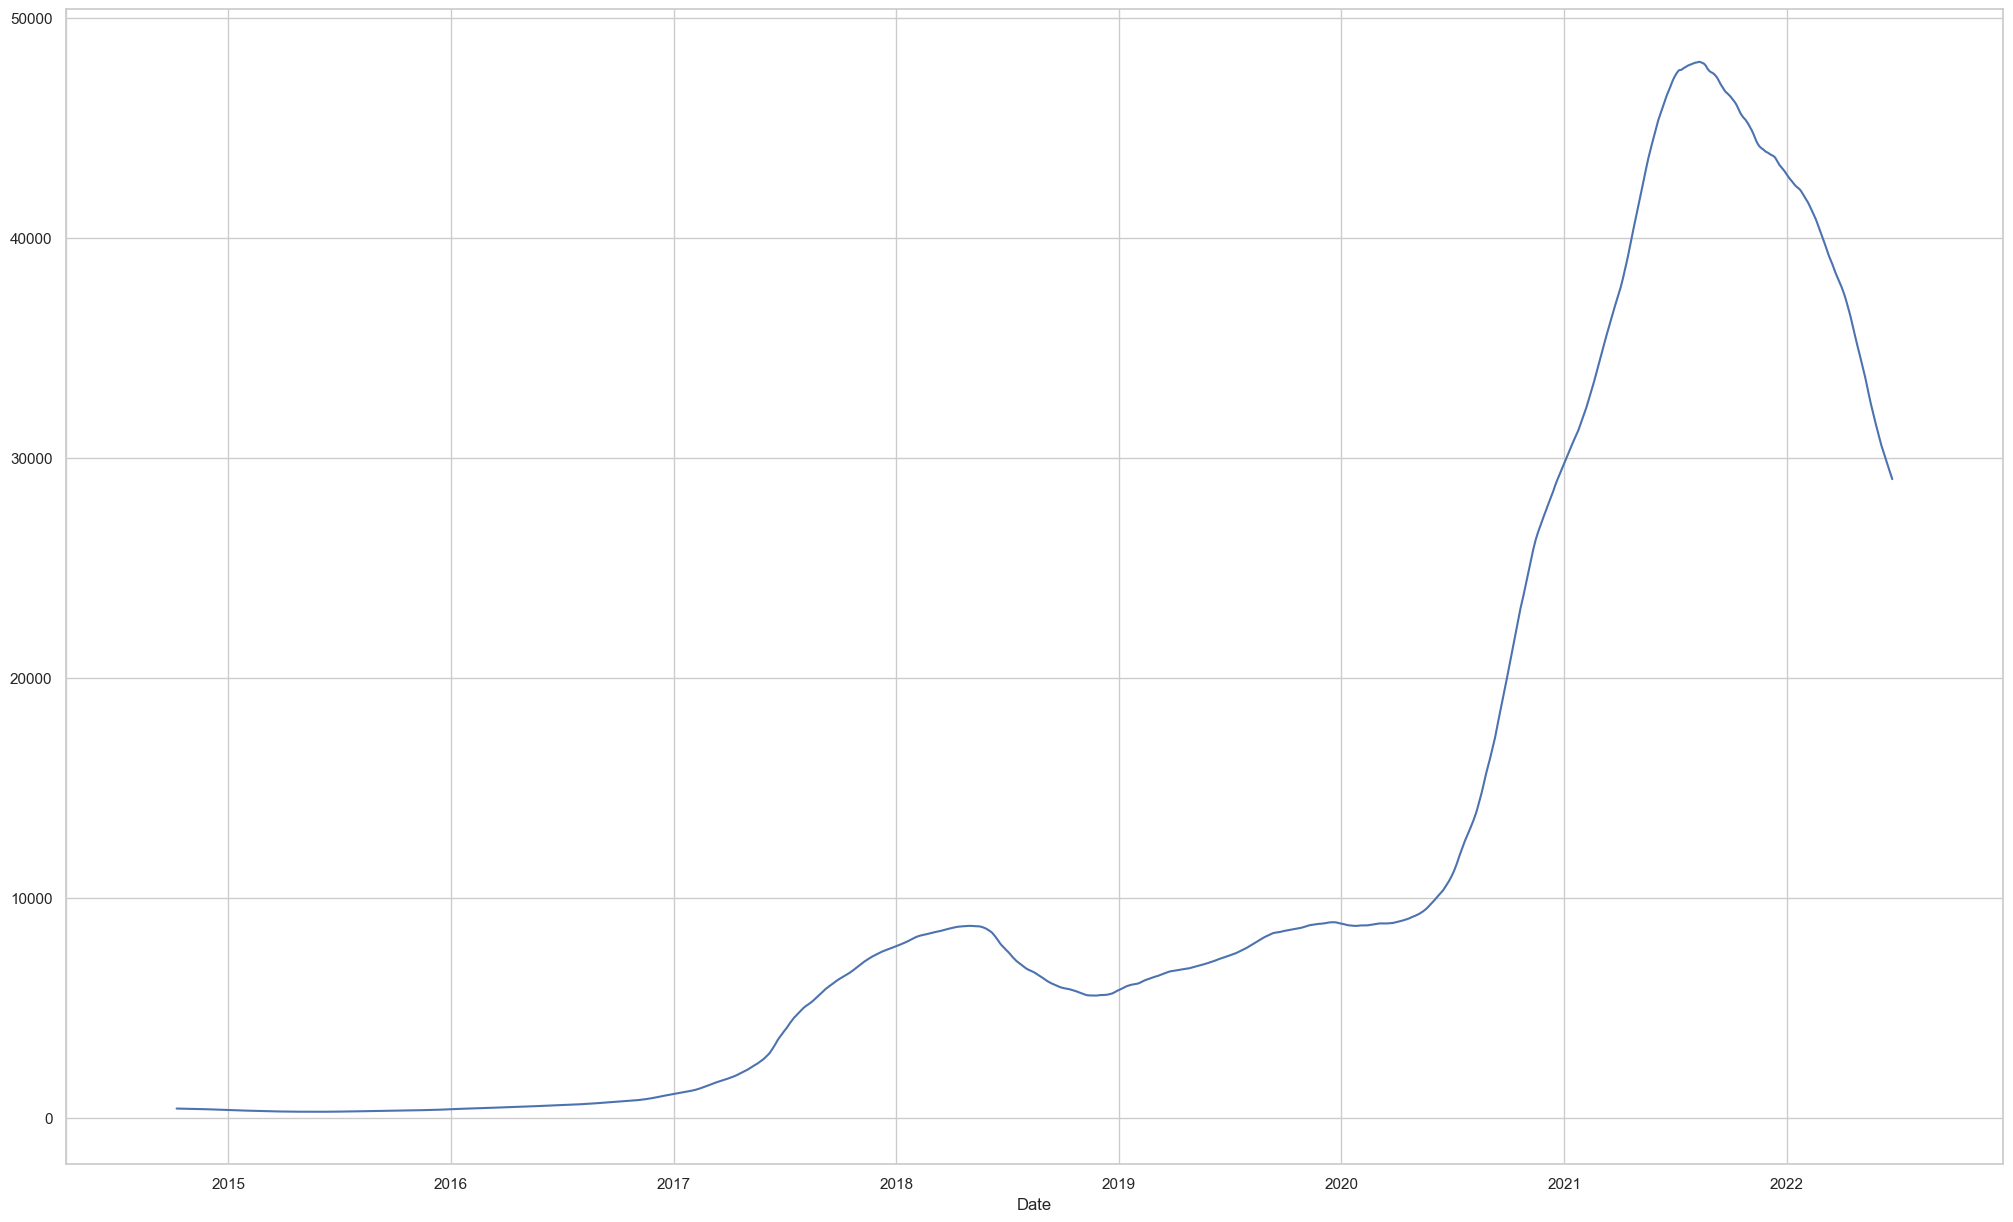

In [52]:
# non stationary
decomposed_train_data_.trend.plot()
plt.show()

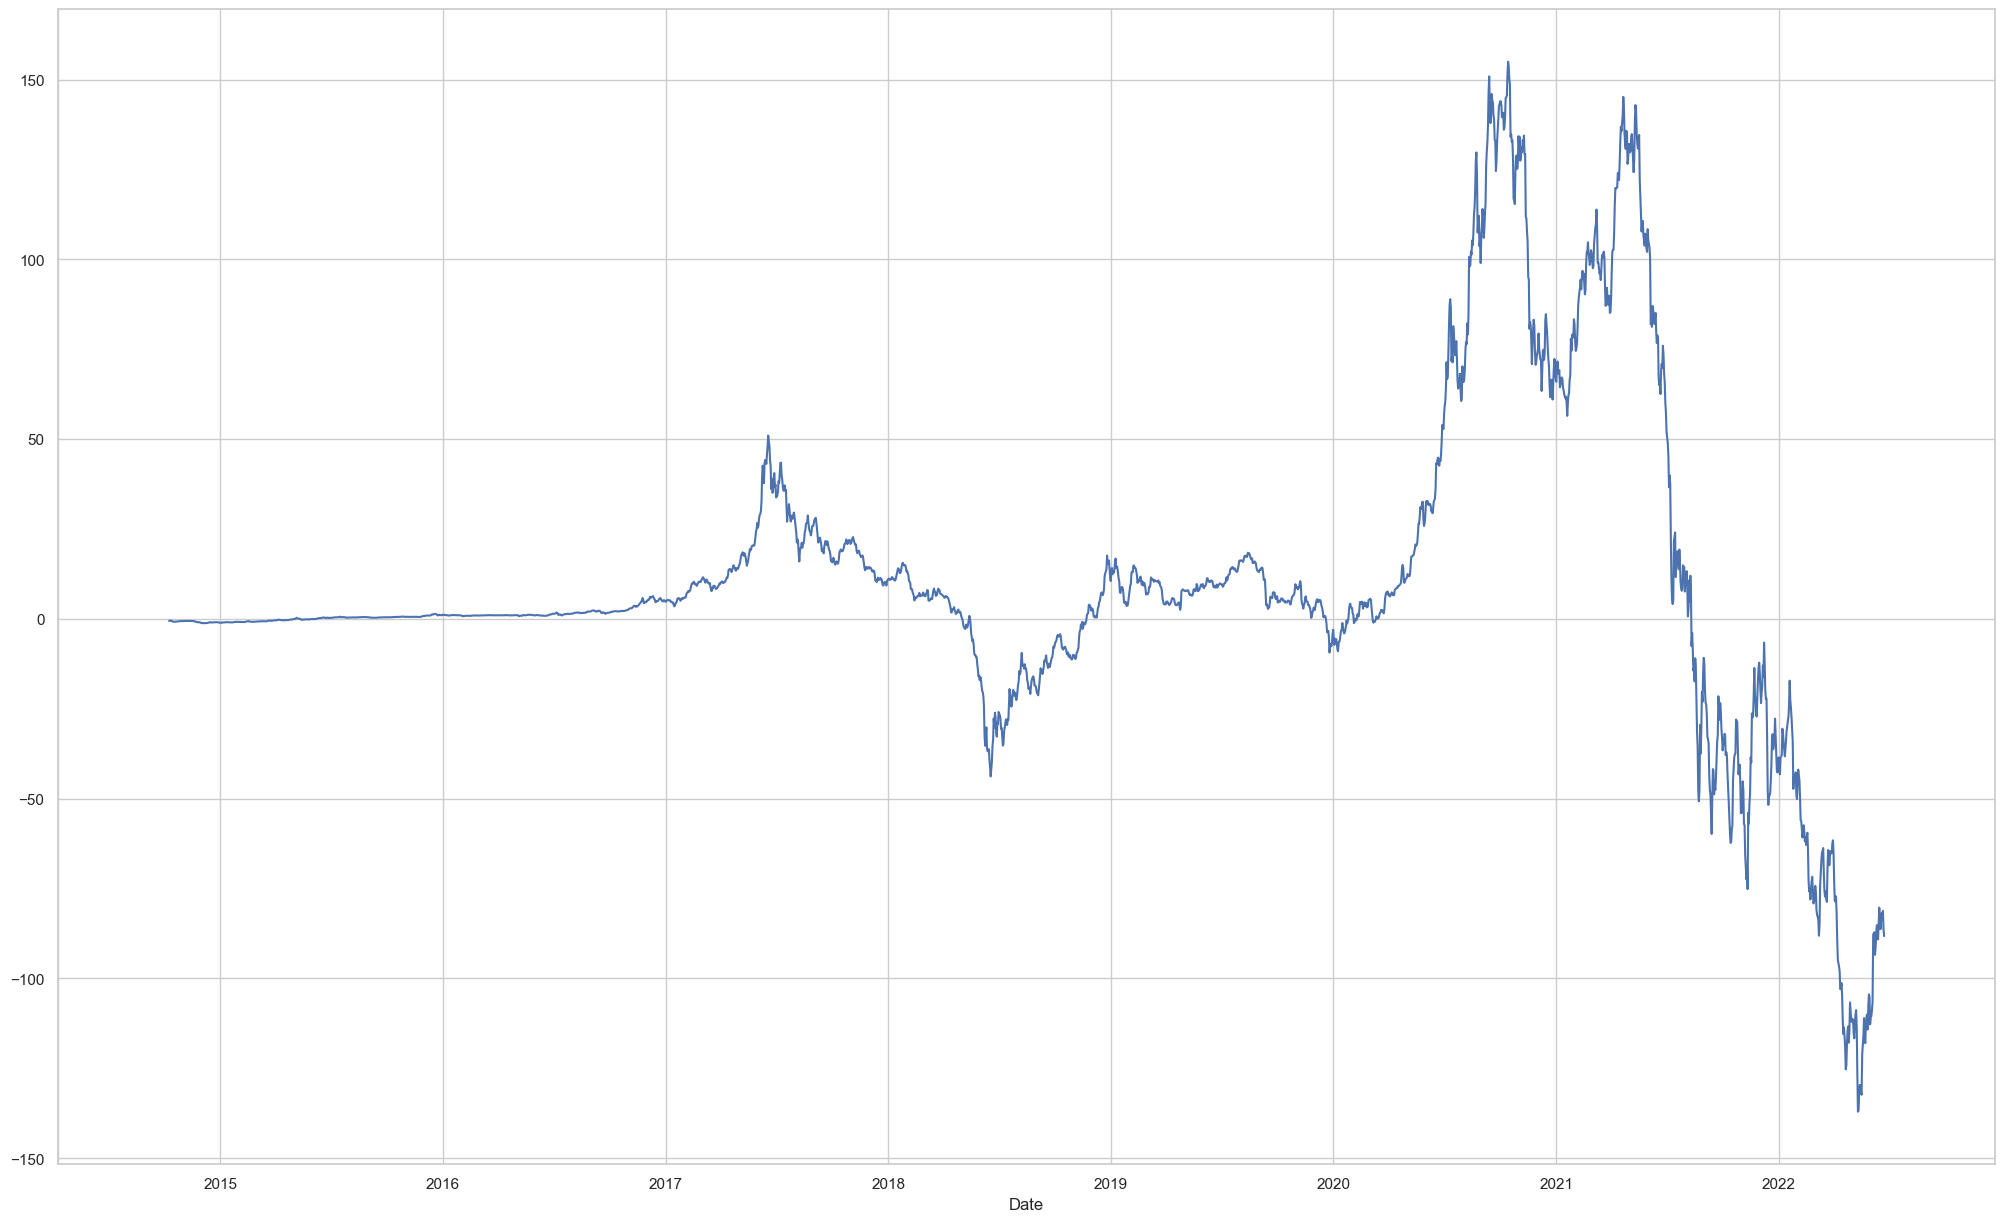

In [53]:
# The new stationary plot
decomposed_train_data_.trend.diff().plot()
plt.show()

In [54]:
train_data_

,marketcap,sentinusd,sentbyaddress,transactionfees,size,confirmationtime,mining_profitability,priceUSD,Change,expanding_mean,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,Return,Mean,difference
Date,,,,,,,,,,,,,,,,,,,,
2014-05-08,5498894595,5.643226e+08,111716,0.0871,231193.0,8.623,28.8060,440.750,1.012778,456.823167,435.189,427.341,431.727,434.535,439.480,448.574,453.541,1.277836,456.823167,NaN
2014-05-09,5562247779,5.389734e+08,105816,0.1050,217006.0,8.471,28.3920,443.871,1.007081,456.405355,440.750,435.189,427.341,431.727,434.535,439.480,448.574,0.708111,456.715200,3.121
2014-05-10,5631944358,2.830841e+08,88498,0.0807,170673.0,8.045,29.3040,449.566,1.012830,456.191625,443.871,440.750,435.189,427.341,431.727,434.535,439.480,1.283030,458.110633,5.695
2014-05-11,5549660308,1.854959e+08,81152,0.0819,217898.0,9.474,24.4820,442.545,0.984383,455.778091,449.566,443.871,440.750,435.189,427.341,431.727,434.535,-1.561728,459.417867,-7.021
2014-05-12,5524900102,2.213686e+08,98608,0.0822,256510.0,8.780,28.1530,438.129,0.990021,455.259000,442.545,449.566,443.871,440.750,435.189,427.341,431.727,-0.997865,459.845167,-4.416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-18,321956223728,3.493454e+09,439567,0.9120,511467.0,9.931,0.0650,16736.000,1.002216,12204.915713,16699.000,17100.000,17584.000,17874.000,17464.000,17000.000,17158.000,0.221570,16846.166667,37.000
2022-12-19,320876529094,6.191116e+09,484919,1.1640,706111.0,10.588,0.0569,16679.000,0.996594,12206.323986,16736.000,16699.000,17100.000,17584.000,17874.000,17464.000,17000.000,-0.340583,16847.300000,-57.000
2022-12-20,322974092809,6.787239e+09,510455,1.1280,665567.0,10.286,0.0630,16788.000,1.006535,12207.765671,16679.000,16736.000,16699.000,17100.000,17584.000,17874.000,17464.000,0.653516,16853.800000,109.000


# Modelling using statstools

# autoregressive (AR) mode

# Forecasting a simulated model

In [55]:
print(train_data_.isnull().values.sum())
train_data_.dropna(axis = 0, how ='any',inplace=True)
print(train_data_.isnull().values.sum())

1
0


In [56]:
# prepare situation
def moving_average_(data):
    X = data
    window = 3
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))]
    predictions = list()
    # walk forward over time steps in test
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    # zoom plot
    pyplot.plot(test[0:100],label="Original")
    pyplot.plot(predictions[0:100], color='red',label="Prediction")
    plt.legend()
    pyplot.show()

Test MSE: 795235.745


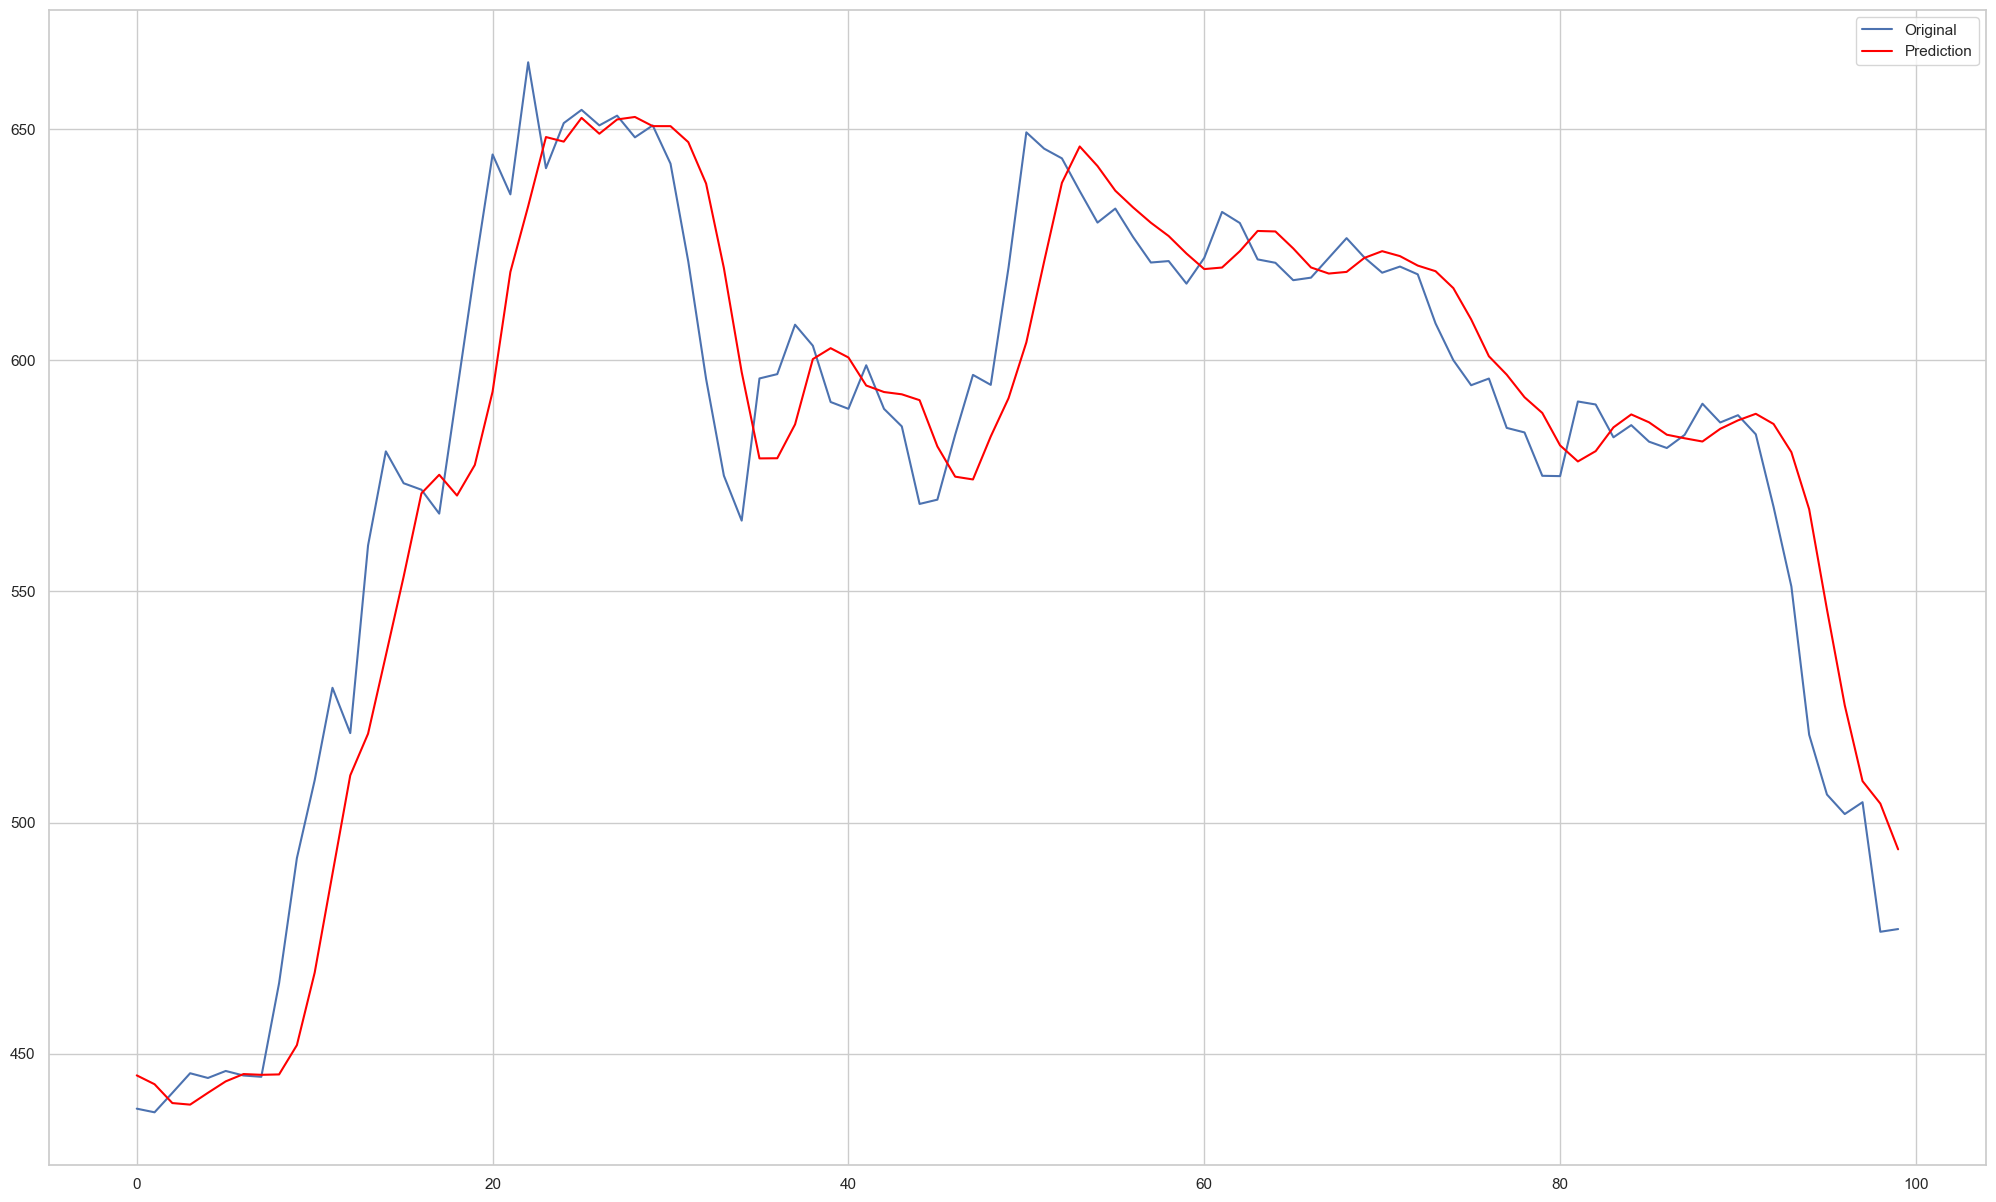

In [57]:
moving_average_(train_data_["priceUSD"].values)

In [58]:
df_train = train_data_[train_data_.index < "2019"]
df_valid = train_data_[train_data_.index >= "2019"]

In [59]:
def exponential_moving_():
    weights = np.arange(1,31) #this creates an array with integers 1 to 31 included
    weights
    wma10 = train_data_["priceUSD"].rolling(30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
    train_data_['30day_WMA'] = np.round(wma10, decimals=3)
    #sma10 = train_data_['priceUSD'].rolling(30).mean()
    temp = train_data_.dropna(how='any',axis=0) 
    print(sqrt(mean_squared_error(temp.priceUSD, temp['30day_WMA'])))
    plt.figure(figsize = (12,6))
    plt.plot(train_data_['priceUSD'], label="Price")
    plt.plot(wma10, label="30-Day WMA")
    #plt.plot(sma10, label="10-Day SMA")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

1870.7099081208917


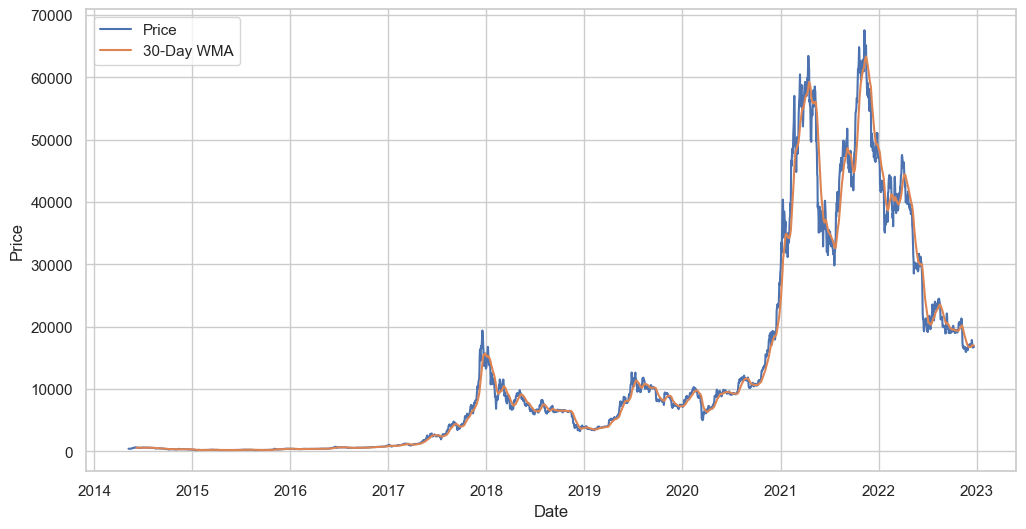

In [60]:
exponential_moving_()

# Exponential Moving Average

In [61]:
def exponential_moving_average():
    ema30 = train_data_['priceUSD'].ewm(span=30).mean()
    train_data_['30_day_EMA'] = np.round(ema30, decimals=3)
    print(sqrt(mean_squared_error(train_data_.priceUSD, train_data_['30_day_EMA'])))
    plt.figure(figsize = (12,6))
    plt.plot(train_data_['priceUSD'], label="Price")
    plt.plot(ema30, label="30-Day WMA")
    #plt.plot(sma10, label="10-Day SMA")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

2150.105200270837


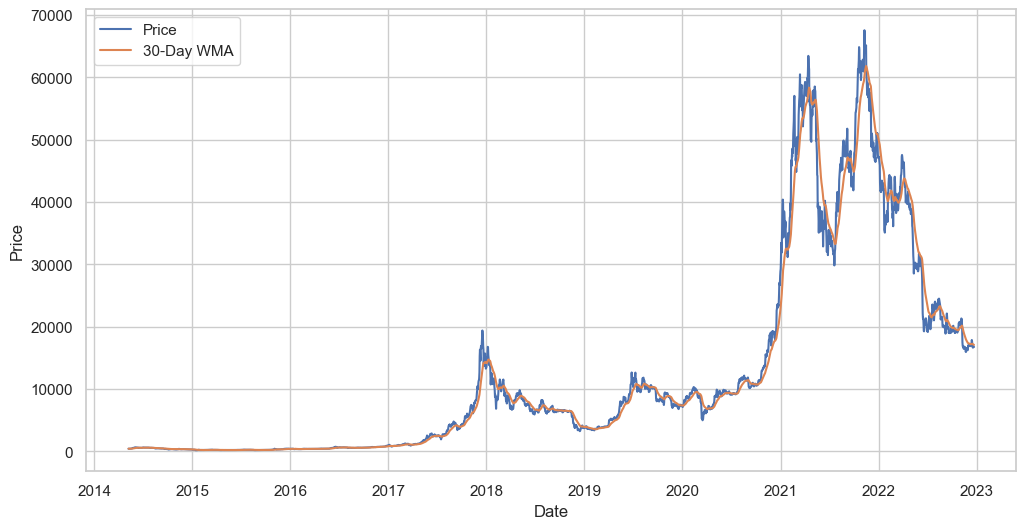

In [62]:
exponential_moving_average()

Test MSE: 795235.745


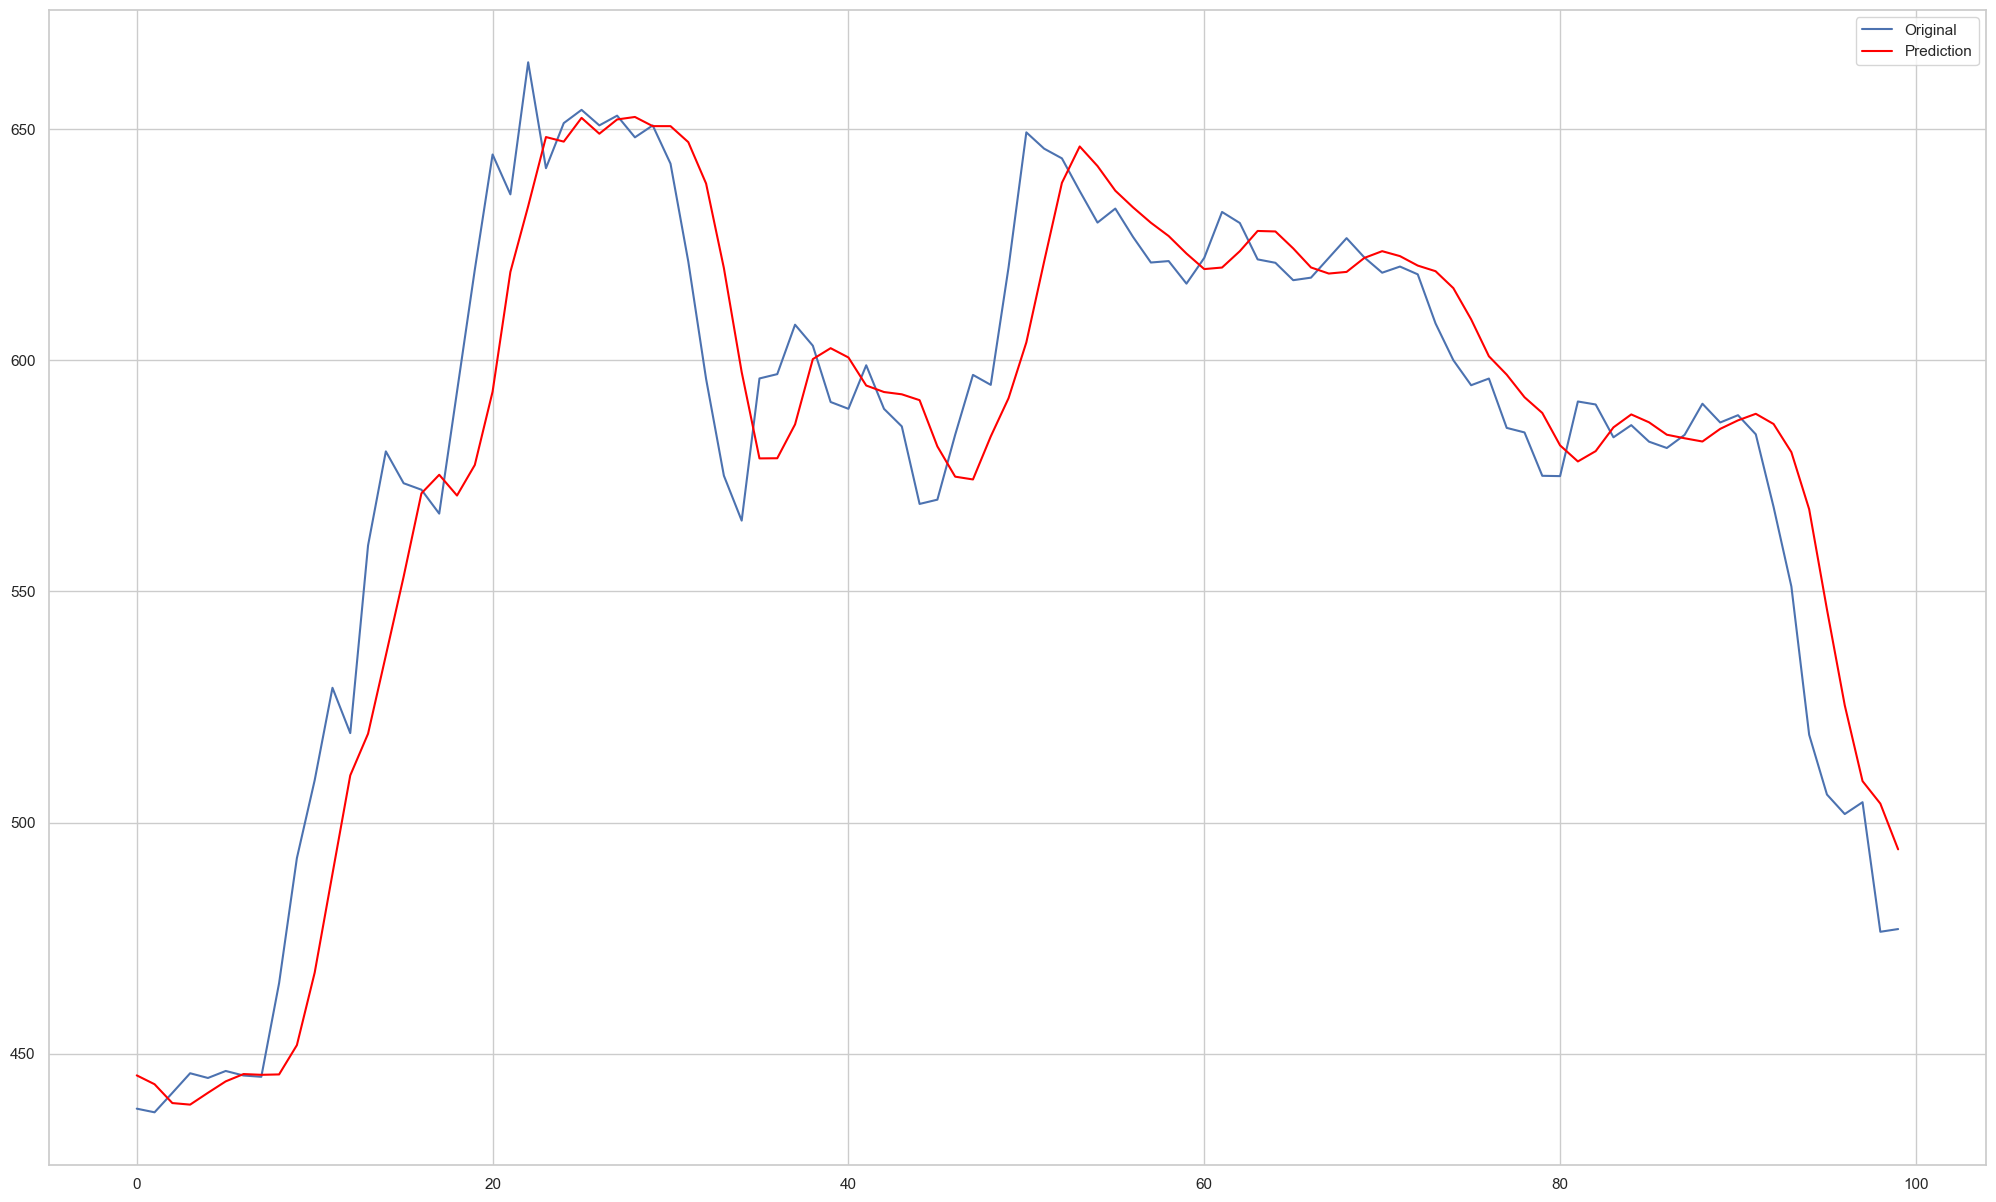

In [63]:

from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# prepare situation
X = train_data_["priceUSD"].values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# zoom plot
pyplot.plot(test[0:100],label="Original")
pyplot.plot(predictions[0:100], color='red',label="Prediction")
plt.legend()
pyplot.show()


# Prediction using ARIMA model

In [64]:
#train_data_.columns
train_data_.fillna(method='ffill', inplace=True)
train_data_.fillna(method='backfill', inplace=True)

In [65]:
train_data_.isnull().values.any()

False

In [66]:
#train_data_.columns

In [67]:
df_train = train_data_[train_data_.index < "2019"]
df_valid = train_data_[train_data_.index >= "2019"]

In [68]:
pip install pmdarima --user

Note: you may need to restart the kernel to use updated packages.


In [69]:
!pip install pmdarima

In [70]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [71]:
from pmdarima import auto_arima
model = auto_arima(df_train.priceUSD, exogenous=df_train,\
                   trace=False, error_action="ignore", suppress_warnings=True)
model.fit(df_train.priceUSD, exogenous=df_train)

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [72]:
forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid)
forecast = pd.DataFrame(forecast).reset_index()
forecast.rename(columns= {0: 'forecasted','index':'date'},inplace=True)

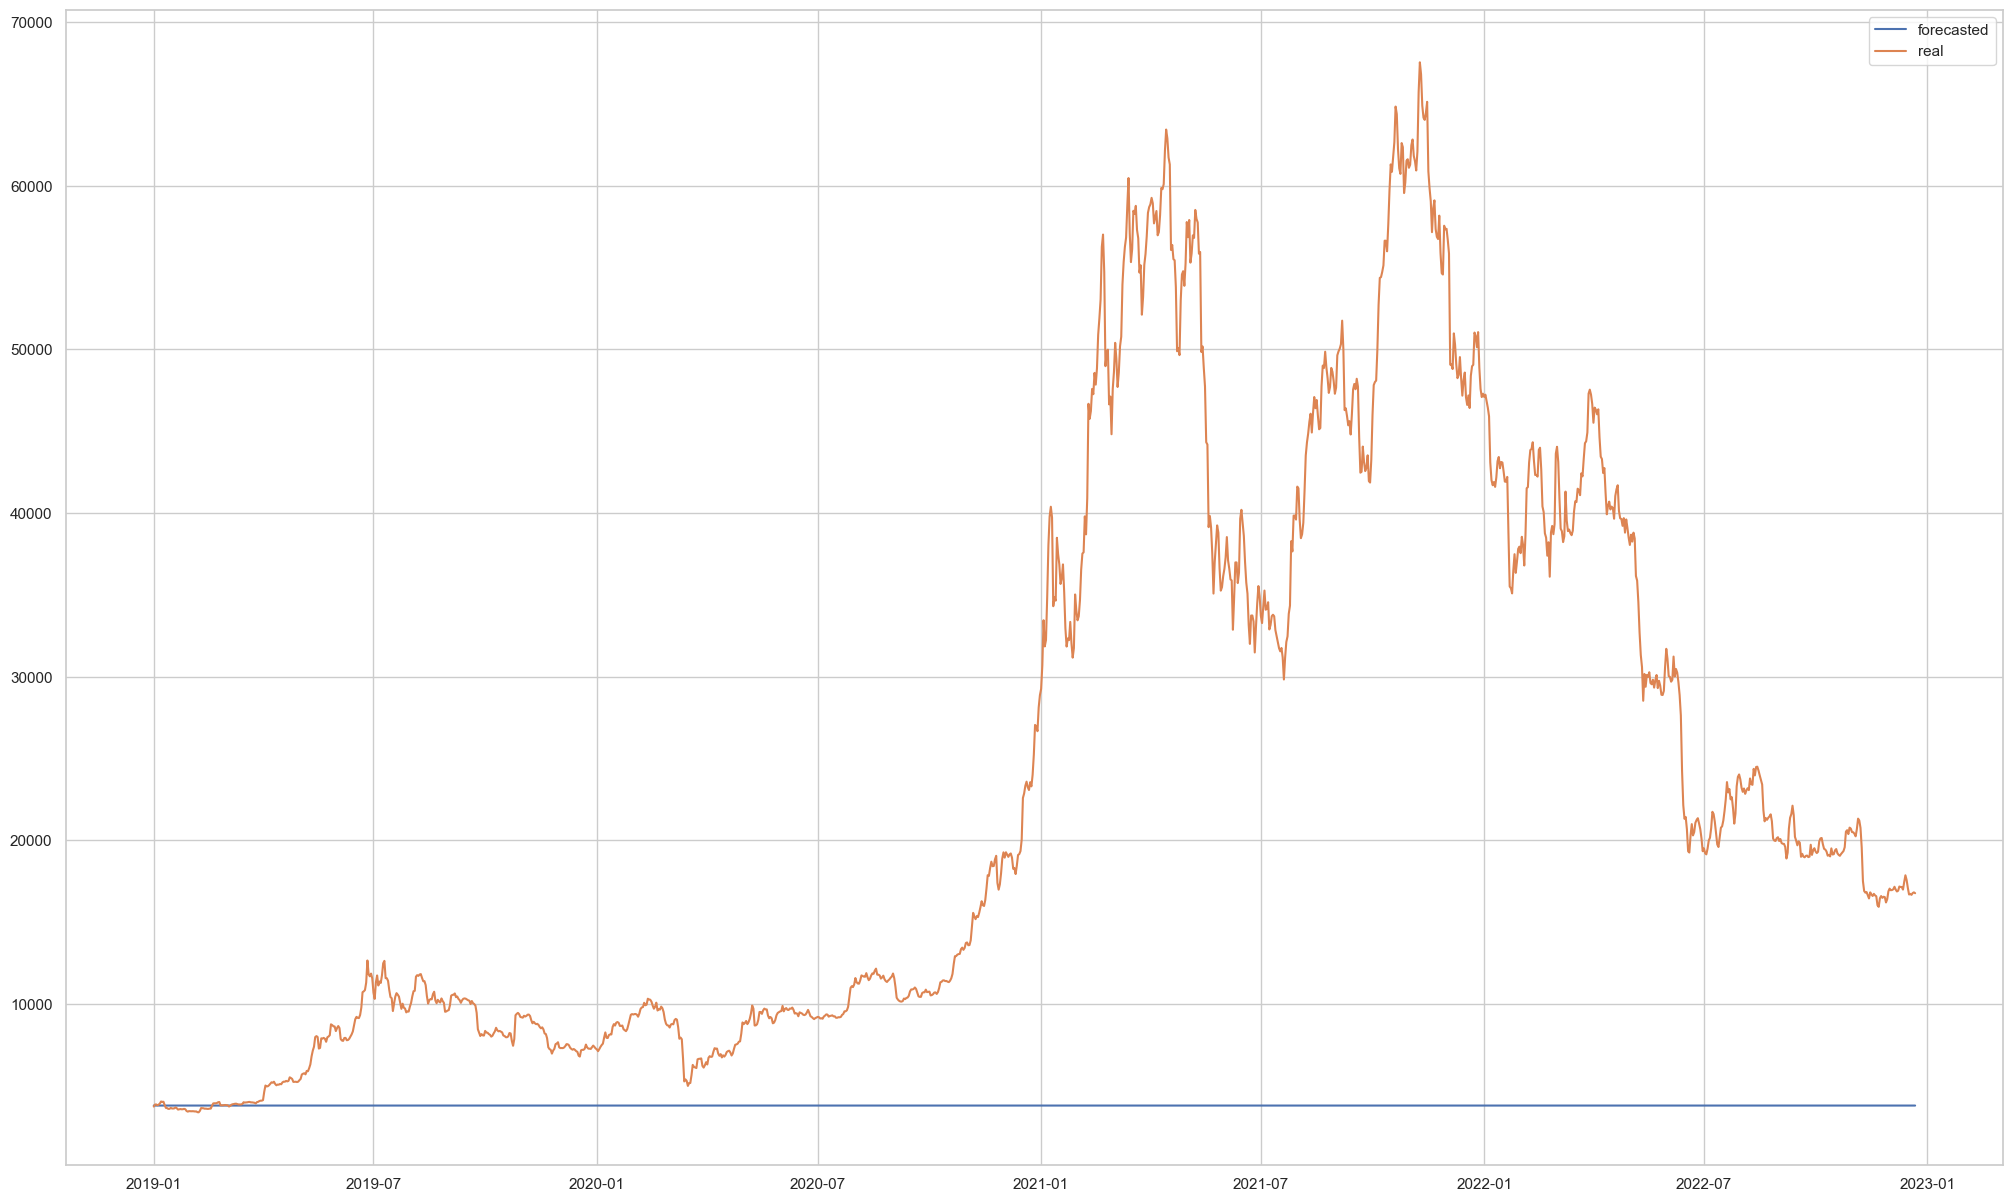

In [73]:
import matplotlib.pyplot as plt
plt.plot(forecast['date'], forecast['forecasted'],label='forecasted')
plt.plot(df_valid.index, df_valid['priceUSD'],label='real')
plt.legend()
plt.show()

In [74]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.priceUSD, forecast['forecasted'])))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.priceUSD, forecast['forecasted']))

RMSE of Auto ARIMAX: 26437.199081958082

MAE of Auto ARIMAX: 19753.764602450814
